Copy 1 es el fichero funcional pero con MOSFETs envejecidos leídos desde el excel importado (léase descripción en Copy 1).
La principal diferencia con esta versión es la limpieza de ciertas partes innecesarias
Otra diferencia es la introduccción de un factor de envejecimiento para no leer de Tabla MOSFET más allá del original
También se han eliminado variables enterradas.
Se han incluido las pérdidas de la bobina en el cálculo

Copy 2 es el fichero funcional pero los valores eficaces de los MOSFETs estaban mal calculados.
En esta versión, se calculan suponiendo un rizado por la bobina despreciable.

VERSION ACTUAL
Incluye mejoras en el cálculo de los valores eficaces y corrige una errata en el cáuclo de Iin en ciertas llamadas a función, que faltaba un paréntesis para dar el orden adecuado.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import scipy.integrate as integrate
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.patches as patches
import random
%matplotlib inline
import MOS_design as MD
import mag_design as MGD

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate

sns.set(style="darkgrid")

In [3]:
# Seleccion de componentes y extracción de parámetros
# MOSFET data
MOSFETs=pd.read_excel(r'.\Space Components.xls',sheet_name="MOSFETs")
# Se usa del siguiente modo:
#MOSFETs['Id (A @25oC)'][54]=70
pd.options.display.max_columns = None
display(MOSFETs.tail(20))


,Part,JEDEC Part,Manufacturer,Type,Vds (V),Id (A @25oC),Id (A @100oC),Rdson (ohms @25oC),Rdson (ohms @125oC),Ciss (pF),Coss (pF),Crss (pF),Qg (nC),Qgs (nC),Qgd (nC),td_on (ns),tr (ns),td_off (ns),tf (ns),Rth jc (oC/W),Rth jPCB (oC/W),Tj_max (oC),Package,Link,NOTES
52,FBS-GAM02-P-R50,NaN,Freebird Semiconductor /EPC Space,3.0,50,10,7.5,0.007,0.01,NP,NP,NP,NP,NP,NP,60,6.5,75,6,8.5,NP,130,18 pin SMT,https://epc.space/documents/datasheets/FBSGAM0...,Half bridge plus driver. Seem to be EPC. Simil...
53,GS66516B,NaN,GaN Systems,2.0,650,60,47,0.025,0.065,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
54,IXTA26P20P,NaN,IXYS,1.0,200,70,26,0.17,0.34,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
55,GS66516B_old1,NaN,GaN Systems,2.0,650,60,47,0.0255,0.0663,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
56,IXTA26P20P_old1,NaN,IXYS,1.0,200,70,26,0.1734,0.3468,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
57,GS66516B_old2,NaN,GaN Systems,2.0,650,60,47,0.026,0.0676,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
58,IXTA26P20P_old2,NaN,IXYS,1.0,200,70,26,0.1768,0.3536,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
59,GS66516B_old3,NaN,GaN Systems,2.0,650,60,47,0.0265,0.0689,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
60,IXTA26P20P_old3,NaN,IXYS,1.0,200,70,26,0.1802,0.3604,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
61,GS66516B_old4,NaN,GaN Systems,2.0,650,60,47,0.027,0.0702,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN


In [4]:
#MOSFETs.loc['GS66516B','Rdson (ohms @25oC)']
#MOSFETs.set_index('Part',inplace=True)

In [5]:
MOSFETs.tail(20)


,Part,JEDEC Part,Manufacturer,Type,Vds (V),Id (A @25oC),Id (A @100oC),Rdson (ohms @25oC),Rdson (ohms @125oC),Ciss (pF),Coss (pF),Crss (pF),Qg (nC),Qgs (nC),Qgd (nC),td_on (ns),tr (ns),td_off (ns),tf (ns),Rth jc (oC/W),Rth jPCB (oC/W),Tj_max (oC),Package,Link,NOTES
52,FBS-GAM02-P-R50,NaN,Freebird Semiconductor /EPC Space,3.0,50,10,7.5,0.007,0.01,NP,NP,NP,NP,NP,NP,60,6.5,75,6,8.5,NP,130,18 pin SMT,https://epc.space/documents/datasheets/FBSGAM0...,Half bridge plus driver. Seem to be EPC. Simil...
53,GS66516B,NaN,GaN Systems,2.0,650,60,47,0.025,0.065,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
54,IXTA26P20P,NaN,IXYS,1.0,200,70,26,0.17,0.34,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
55,GS66516B_old1,NaN,GaN Systems,2.0,650,60,47,0.0255,0.0663,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
56,IXTA26P20P_old1,NaN,IXYS,1.0,200,70,26,0.1734,0.3468,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
57,GS66516B_old2,NaN,GaN Systems,2.0,650,60,47,0.026,0.0676,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
58,IXTA26P20P_old2,NaN,IXYS,1.0,200,70,26,0.1768,0.3536,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
59,GS66516B_old3,NaN,GaN Systems,2.0,650,60,47,0.0265,0.0689,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN
60,IXTA26P20P_old3,NaN,IXYS,1.0,200,70,26,0.1802,0.3604,2740,540,100,56,18,20,18,33,46,21,0.42,0.5,125,NaN,NaN,NaN
61,GS66516B_old4,NaN,GaN Systems,2.0,650,60,47,0.027,0.0702,518,126,5.9,14.2,3.8,5.4,4.6,12.4,14.9,22,0.27,23,150,NaN,NaN,NaN


In [6]:
float(MOSFETs.loc[MOSFETs['Part']=='GS66516B','Rdson (ohms @25oC)'])
MOSFETs[MOSFETs['Part']=='GS66516B'].index[0]

53

# Variables de entrada y configuración

In [401]:
Vbus=100 # Tensión en el bus
Vsa_min=80 #Máximo y minimo de la tensión del panel solar
Vsa_max=150
fsw=180e3 #100000 # Frecuencia de conmutación
T=1/fsw
P=500 # Potencia nominal
L_ind=84/1000000

size_D1=50 #Número de elementos en los vectores de D1 y D2.
size_D2=40

# Estos no son límites de operación, que vienen definidos por las variables de arriba. Estos son límites de representación
# de las gráficas como los mapas de calor.
D1_min_sh=0.5
D1_max_sh=1
D2_min_sh=0
D2_max_sh=0.6

D1_nom=0.8
D2_nom=0.1
D1_max=0.95
D2_min=0.05


phi_bob=0.4 #Desfase entre las señales de gobierno D1 y D2.
Lim_sup_D1=0.95 # Límites máximos de operación de los ciclos de trabajo
Lim_inf_D2=0.05

# MOSFET seleccionados en la implementación, según la tabla importada de Excel.
chosen_FET='GS66516B' 
M1_index=MOSFETs[MOSFETs['Part']==chosen_FET].index[0]
M2_index=MOSFETs[MOSFETs['Part']==chosen_FET].index[0]
M3_index=MOSFETs[MOSFETs['Part']==chosen_FET].index[0]
M4_index=MOSFETs[MOSFETs['Part']==chosen_FET].index[0]
Mprot_index=MOSFETs[MOSFETs['Part']=='IXTA26P20P'].index[0]
prot_on=1
#Características del driver de los MOSFETs (paera pérdidas de conmutación)
Vdrvr=9
Idrvr=4

# Máximo envejecimiento
aging=1.1 #Sólo como ejemplo en ciertas partes.
aging_extra=1.2

aging_max=0.12 # Tanto por uno. FIjado según artículo de DUsmez Remaining useful...
aging_steps=6 #Número de muestras a la hora de construir la base de datos
elements=30 # Núemro de muestras tomadas en la curva de péridas en función de la ganancia

error_sense=50.0 # en tanto por mil

# Del material magnético y el núcleo se fija un E30/15/7 3F3
c_ind=6.198/10000000000000
x_ind=1.721
y_ind=2.736
Vol_ind=0.000004
N_ind=40
Ae_ind=0.00006
fw_ind=0.3
WA_ind=0.00009
lm_ind=0.056
rho=1/57000000
Awire_ind=WA_ind*fw_ind/N_ind
Lwire_ind=N_ind*lm_ind

# Definición de funciones para la operación del convertidor

## Ejemplo de uso de las funciones principales

Irms 5.86873321124834
Iavg 5.0
Ipk 6.108893324462187
Iripple 2.217786648924374


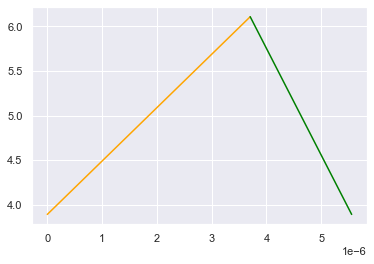

In [9]:
#Example
D1_ex=1*100/150
D2_ex=0*(100-70)/100
phi_ex=0
fsw_ex=180000
T_ex=1/fsw_ex
Vin_ex=150
P_ex=500
Iin_ex=P_ex/Vin_ex
L_ex=83.5e-6


Vout_ex=Vin_ex*Gain(D1_ex,D2_ex)

Ip1_ini_ex= Iini(L_ex,Vin_ex,Iin_ex,Vout_ex,D1_ex,D2_ex,phi_ex,T_ex)

outcome_ex=intervals(D1_ex,D2_ex,phi_ex,T_ex)

t1_x_ex=outcome_ex[0]
t2_x_ex=outcome_ex[3]
t3_x_ex=outcome_ex[6]
t4_x_ex=outcome_ex[9]


t1_ini_ex=outcome_ex[1]
t2_ini_ex=outcome_ex[4]
t3_ini_ex=outcome_ex[7]
t4_ini_ex=outcome_ex[10]

t1_end_ex = outcome_ex[2]
t2_end_ex = outcome_ex[5]
t3_end_ex = outcome_ex[8]
t4_end_ex = outcome_ex[11]

Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,Ip4_end_ex=currents_L(L_ex,Vin_ex,Vout_ex,Iin_ex,D1_ex,D2_ex,phi_ex,T_ex)

plt.plot(t1_x_ex,Ip1(t1_x_ex,L_ex,Vin_ex,Vout_ex,Ip4_end_ex,phi_ex,D1_ex,D2_ex),'blue')
plt.plot(t2_x_ex,Ip2(t2_x_ex-t1_end_ex,L_ex,Vin_ex,Vout_ex,Ip1_end_ex,phi_ex,D1_ex,D2_ex),'red')
plt.plot(t3_x_ex,Ip3(t3_x_ex-t2_end_ex,L_ex,Vin_ex,Vout_ex,Ip2_end_ex,phi_ex,D1_ex,D2_ex),'orange')
plt.plot(t4_x_ex,Ip4(t4_x_ex-t3_end_ex,L_ex,Vin_ex,Vout_ex,Ip3_end_ex,phi_ex,D1_ex,D2_ex),'green')

Iavg_ex=Iind_avg(Ip4_end_ex,Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,t1_end_ex-t1_ini_ex,t2_end_ex-t2_ini_ex,t3_end_ex-t3_ini_ex,t4_end_ex-t4_ini_ex)

Irms_1=Irms_sec(fsw_ex,t1_end_ex,t1_ini_ex,Ip1_end_ex,Ip4_end_ex)
Irms_2=Irms_sec(fsw_ex,t2_end_ex,t2_ini_ex,Ip2_end_ex,Ip1_end_ex)
Irms_3=Irms_sec(fsw_ex,t3_end_ex,t3_ini_ex,Ip3_end_ex,Ip2_end_ex)
Irms_4=Irms_sec(fsw_ex,t4_end_ex,t4_ini_ex,Ip4_end_ex,Ip3_end_ex)

ch1,ch2,ch3,ch4=Irms_Mi(D1_ex,D2_ex,phi_ex,fsw_ex,t1_end_ex,t2_end_ex,t3_end_ex,t4_end_ex,t1_ini_ex,Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,Ip4_end_ex)
Irms_tot=np.sqrt(Irms_1**2+Irms_2**2+Irms_3**2+Irms_4**2)
Irms_in=np.sqrt(Irms_1**2+Irms_2**2)
Iavg_in=Iavg_sec(fsw_ex,t1_end_ex,t1_ini_ex,Ip1_end_ex,Ip4_end_ex)+Iavg_sec(fsw_ex,t2_end_ex,t2_ini_ex,Ip2_end_ex,Ip1_end_ex)
#print(Vout_ex,Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,Ip4_end_ex,Iavg_ex,Irms_tot,Irms_in,Iavg_in,ch1,ch2,ch3,ch4)
print('Irms',Irms_tot)
print('Iavg',Iavg_ex)
print('Ipk',max(Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,Ip4_end_ex))
print('Iripple',(max(Ip1_end_ex,Ip2_end_ex,Ip3_end_ex,Ip4_end_ex)-Iavg_ex)*2)

In [10]:
vo=100
iout=5
vs=70
duty=(vo-vs)/vo
periodo=1/180000
induc=83.5e-6

Iavgboost=vo*iout/vs
Iripboost=(vs*duty)*periodo/induc
imin=Iavgboost-Iripboost/2
Irmsboost=(np.sqrt(imin*imin+imin*Iripboost+Iripboost*Iripboost/3))
Irmsboost2=np.sqrt(Iavgboost*Iavgboost+Iripboost*Iripboost/12)
print('Iavg',Iavgboost)
print('Irms',Irmsboost)
print('irip',Iripboost)
print('Ipk', imin+Iripboost)
print('Irmsboost2',Irmsboost2)

Iavg 7.142857142857143
Irms 7.154235816497222
irip 1.3972055888223553
Ipk 7.84145993726832
Irmsboost2 7.154235816497223


In [11]:
vobuck=100
ioutbuck=5
vsbuck=150
dutybuc=(vobuck/vsbuck)
periodobuck=1/180000
inducbuck=83.5e-6

ioutbuck=500/vobuck
Iavgbuck=ioutbuck
Iripbuck=(vsbuck-vobuck)*periodo*dutybuc/inducbuck
iminbuck=Iavgbuck-Iripbuck/2
Irmsbuck=(np.sqrt(iminbuck*iminbuck+iminbuck*Iripbuck+Iripbuck*Iripbuck/3))
Irmsbuck2=np.sqrt(Iavgbuck*Iavgbuck+Iripbuck*Iripbuck/12)
print('Iavg',Iavgbuck)
print('Irms',Irmsbuck)
print('irip',Iripbuck)
print('Ipk', iminbuck+Iripbuck)
print('Irmsboost2',Irmsbuck2)

Iavg 5.0
Irms 5.040821507288827
irip 2.2177866489243736
Ipk 6.108893324462187
Irmsboost2 5.040821507288827


## Validación mediante comparación con fichero de simulación
##### El fichero empleado es Buck_Boost v1_DHB.  Se representa la imagen y los resultados mostrados por las ecuaciones desarrolladas en el script de python y aplicadas en la sección anterior "Ejemplo de uso de las ecuaciones anteriores". Tan sólo hay que copiar los valores adjuntados abajo en la celda de arriba para tener los resultados.

In [12]:
# Ciclo D2 mayor que D1 y un phi menor que D1
#  Se valida sobre buck_Boost v1_DHB
#  Se prueba con los parámetros
#  D1_ex=0.3
#  D2_ex=0.6
#  phi_ex=0.2
#  fsw_ex=100000
#  T_ex=1/fsw_ex
#  Vin_ex=10
#  P_ex=500
#  Iin_ex=P_ex/Vin_ex
#  L_ex=0.00001
# Se ajustan bastante, aunque hay una pequeña discrepancia en el valor de inicio (0.2 sobre 166 A), lo que descuadra también
# un poco el resto de valores analizados

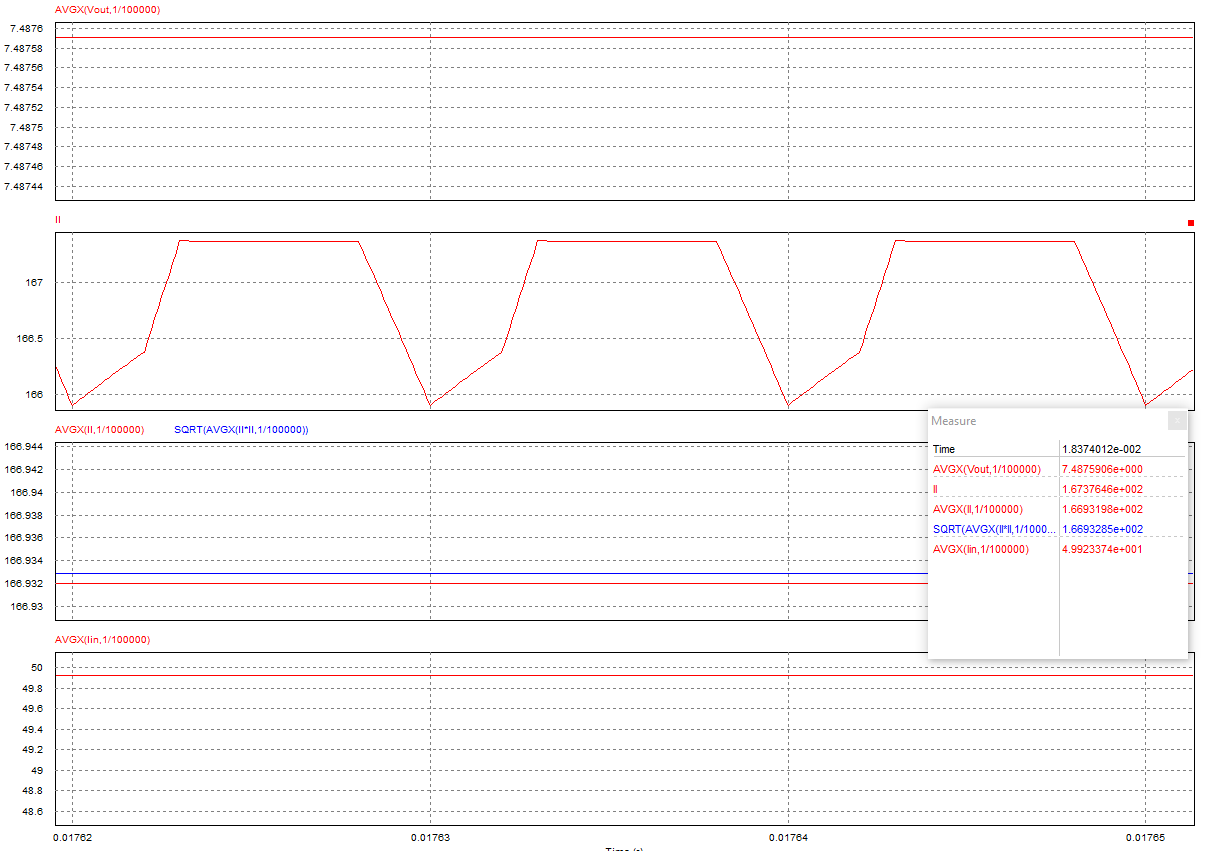

 

In [13]:
# Ciclo D2 mayor que D1 y un phi nulo. REVISAR, HAY UN DESCUADRE DE 2A EN EL VALOR MEDIO DE LA CORRIENTE POR LA BOBINA

# D1_ex=0.3
# D2_ex=0.6
# phi_ex=0.0
# fsw_ex=100000
# T_ex=1/fsw_ex
# Vin_ex=10
# P_ex=500
# Iin_ex=P_ex/Vin_ex
# L_ex=0.00001
# Los valores arrojados en el orden estándar son:
# (7.499999999999999,
#  163.66666666666666,
#  166.66666666666666,
#  166.66666666666666,
#  163.66666666666666,
#  165.61666666666667,
#  166.82289344624667,
#  90.46675264058798,
#  49.55)
# Hay algo de discrepancia, mayor que antes, aunque se maneja bien el hecho de que sólo hay tres intervalos.

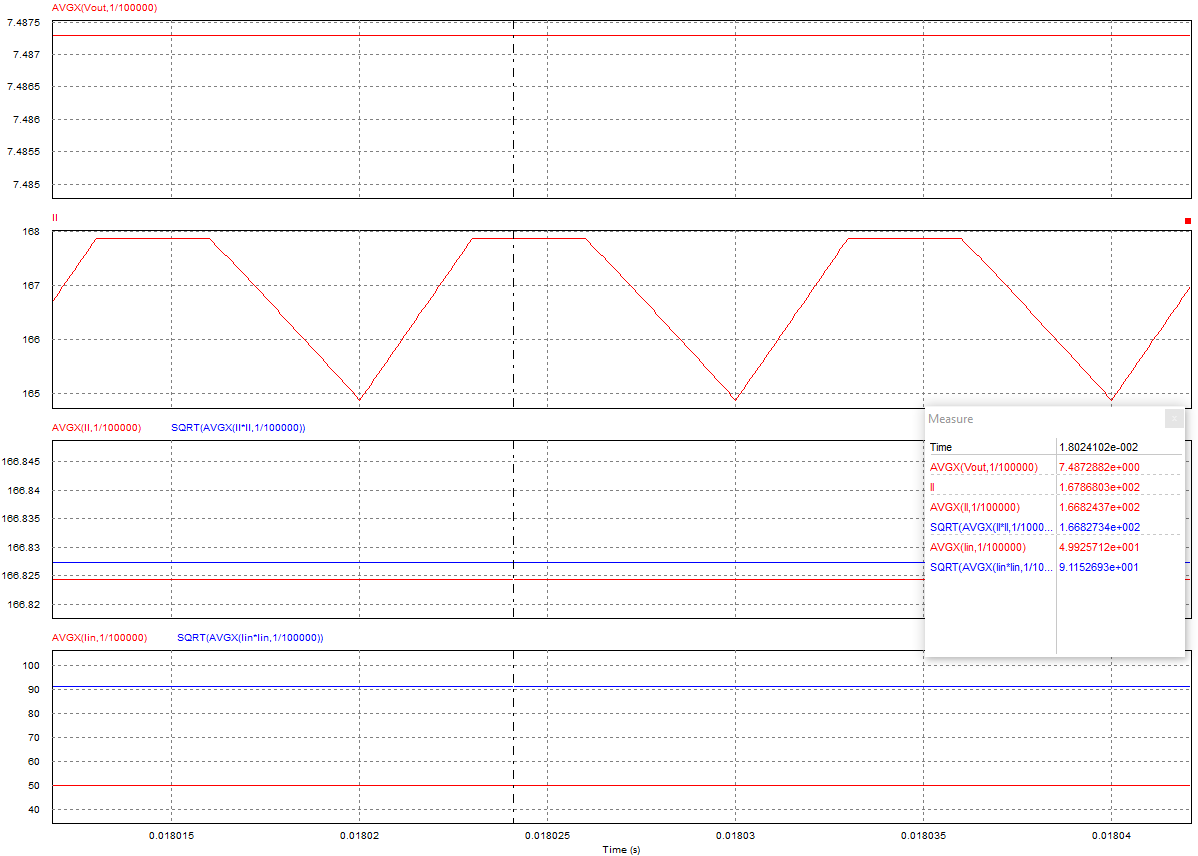

In [14]:
#D1 mayor que D2 y acabando éste antes de D1.
# D1_ex=0.6
# D2_ex=0.2
# phi_ex=0.2
# fsw_ex=100000
# T_ex=1/fsw_ex
# Vin_ex=10
# P_ex=500
# Iin_ex=P_ex/Vin_ex
# L_ex=0.00001
# Los valores arrojados en el orden estándar son:
# (7.499999999999999,
#  83.25,
#  85.25,
#  85.75,
#  82.75,
#  84.25,
#  85.4684883451205,
#  52.891240610646804,
#  33.45)
# De nuevo, todos los deltas de Il están bien, pero el punto de partida es incorrecto (+1 A).

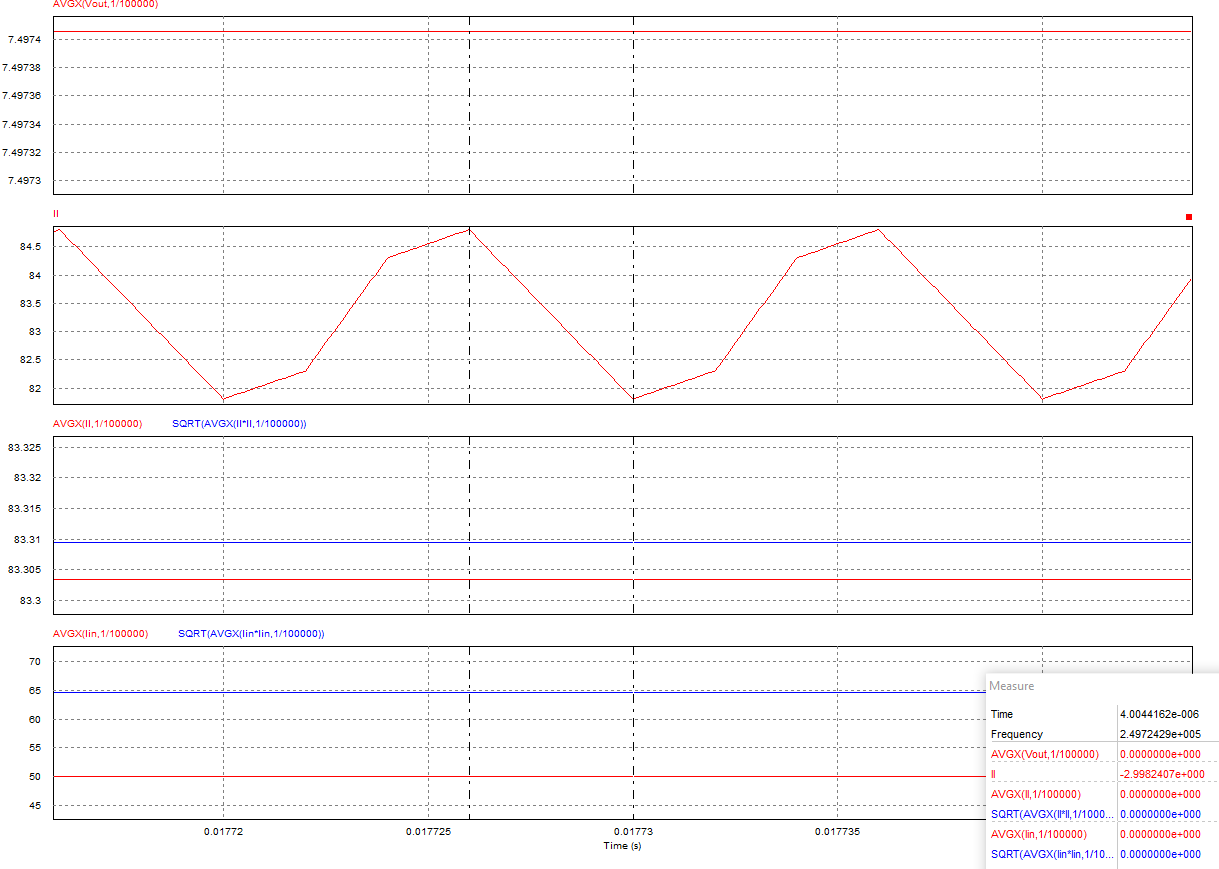

# Extracción de parámetros de MOSFETs calificados para espacio

# Funciones de cálculo de pérdidas en los componentes

In [402]:
# cond_losses_temp(1,0.25,53,1,1,1,1,25,125)

# Pérdidas en el mapa de ganancias

## Pérdidas para MOSFETs sin envejecer

[[29.005249114359977, 30.593344373928332, 32.05388265296586, 33.42678328489701, 34.73908989199251, 36.009918309371855, 37.25323726056509, 38.47954123862812, 39.696905288463284, 40.91167510064931, 42.128932501318744, 43.35281768229932, 44.27555574400968], [22.654505906563234, 22.780794308584333, 24.03442822011275, 25.575952731358917, 26.92379232178896, 28.251148738188967, 29.569624216051153, 30.888152844808634, 32.21379418644107, 33.55225620873052, 34.90825087780045, 35.986795886717175, 35.81252593275116], [18.61738377485618, 18.538805764427828, 18.800468607852878, 19.784537213019977, 21.22291481449949, 22.783100060414583, 24.4635526735364, 26.205892542624998, 27.665254875022242, 29.155329209200165, 29.91488769810469, 29.81637572538413, 29.772977384648208], [16.086814466080526, 15.855626423736357, 15.974794437194275, 16.358209499604477, 17.199705168490773, 18.556942781029484, 20.040539058808726, 21.64905430612772, 23.38263867513423, 24.529697652152855, 25.067269762190723, 25.11648092639

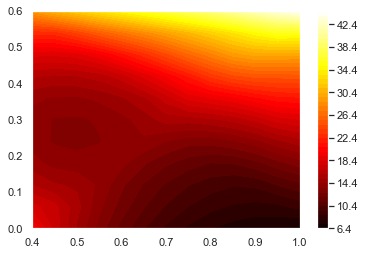

<Figure size 720x360 with 0 Axes>

,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0.60,29.005249,30.593344,32.053883,33.426783,34.739090,36.009918,37.253237,38.479541,39.696905,40.911675,42.128933,43.352818,44.275556
0.54,22.654506,22.780794,24.034428,25.575953,26.923792,28.251149,29.569624,30.888153,32.213794,33.552256,34.908251,35.986796,35.812526
0.48,18.617384,18.538806,18.800469,19.784537,21.222915,22.783100,24.463553,26.205893,27.665255,29.155329,29.914888,29.816376,29.772977
0.42,16.086814,15.855626,15.974794,16.358209,17.199705,18.556943,20.040539,21.649054,23.382639,24.529698,25.067270,25.116481,25.179595
0.36,14.623486,14.272601,14.287401,14.573506,15.075585,15.860319,17.192793,18.657122,19.257232,19.824740,20.645295,21.337624,21.487107


In [19]:
# #print(D2_r)
# #print(aux)
# #print(D1_r[::-1])
# print(aux[::-1][:])
# fig, ax = plt.subplots()
# gr=ax.contourf(D1_r, D2_r[::-1], aux[::-1][:], 50, cmap='hot')#,vmin=6.9,vmax=30)  #'RdYlBu'
# fig.colorbar(gr)
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(5)

# plt.show()
# Prueba=pd.DataFrame(aux[::-1][:],D2_r[::-1],D1_r)
# Prueba.head()

## Diferencia de pérdidas por envejecimiento

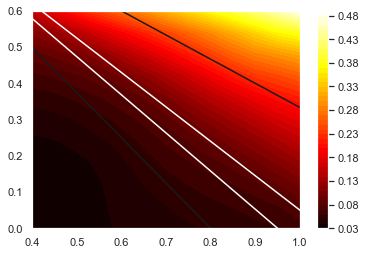

11

In [20]:
# # Se deben aplicar todas las mejoras que se apliquen en el bloque anterior

# fig, ax = plt.subplots()

# # Se debe tener en cuenta que aux1 almacena las diferencias entre las pérdidas de convertidor con los MOSFETs envejecidos
# # (aux_M1, aux_M2,...) y las pérdidas calculadas en el bloque anterior, que son con los MOSFETs sin envejecer (aux)
# aux1=[ [ 0 for i in range(size_D1) ] for j in range(size_D2) ] #create empty matrix of size D2,D1
# for j in range(size_D2):
#     for i in range(size_D1):
#         c=currents_L(L_ind,Vin_f(Vbus,D1_r[i],D2_r[j]),Vbus,P/Vin_f(Vbus,D1_r[i],D2_r[j]),D1_r[i],D2_r[j],phi_bob,T)
#         interv=intervals(D1_r[i],D2_r[j],phi_bob,T)
#         Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(D1_r[i],D2_r[j],phi_bob,fsw,interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
#         aux_M1=Losses_M1(D1_r[i],Vin_f(Vbus,D1_r[i],D2_r[j]),c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,aging)
#         aux_M2=Losses_M2(D1_r[i],Vin_f(Vbus,D1_r[i],D2_r[j]),c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,1)
#         aux_M3=Losses_M3(D2_r[j],Vbus,c[2],c[0],fsw,M3_index,Vdrvr,Idrvr,Irms_M3,1)
#         aux_M4=Losses_M4(D2_r[j],Vbus,c[0],c[2],fsw,M4_index,Vdrvr,Idrvr,Irms_M4,1)
#         aux_protM1=Losses_prot(Mprot_index,Irms_M1,1)
#         aux_protM3=Losses_prot(Mprot_index,Irms_M3,1)
#         Iac_ind=max(c)-min(c)
#         Irms_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
#         aux_L=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
#         aux1[j][i]=aux_M1+aux_M2+aux_M3+aux_M4+aux_protM1+aux_protM3+aux_L-aux[j][i]

# #Plot the surface.
# gr=ax.contourf(D1_r, D2_r, aux1, 50, cmap='hot')
# fig.colorbar(gr)

# ax.plot(D1_r,D2_f(Vbus,Vsa_max,D1_r),'k')
# ax.plot(D1_r,D2_f(Vbus,Vsa_min,D1_r),'k')

# # Esta líneas indican el máximo y mínimo que podrían cubrirse cuando el ciclo de trabajo D1 o D2 ya no pueden crecen más (95%)
# ax.plot(D1_r,D2_f(Vbus,Lim_sup_D1*Vbus,D1_r),'w')
# ax.plot(D1_f(Vbus*(1-Lim_inf_D2),Vbus,D2_r),D2_r,'w')


# #ax.plot(D1_r,D2_r,'g')
# plt.xlim(D1_min_sh,D1_max_sh)
# plt.ylim(D2_min_sh,D2_max_sh)

# plt.show()

# #Eje Y es D2 y Eje X es D1

# size_D2

[[0.15625000000000355, 0.18614886107430095, 0.2142643537181712, 0.24128684687960344, 0.26768096070161107, 0.2937723929856304, 0.31979753431355107, 0.34593323712086743, 0.3723154213674533, 0.3990511135009527, 0.4262264724324396, 0.45391228099336445, 0.4821677899554899], [0.11358747142115888, 0.12423361938503774, 0.14615291676141595, 0.1708101961345747, 0.19423240387969898, 0.21771684675714909, 0.2414817932640716, 0.2656946643318534, 0.29048792319041894, 0.31596935704511964, 0.342228931528048, 0.36684806797815384, 0.38234082826022586], [0.08548469921974444, 0.09270692071398656, 0.10205198882176347, 0.11864995628225827, 0.1399999411668773, 0.16274013174305324, 0.18714237286196678, 0.21294120946427597, 0.23719772494999347, 0.26248819893488573, 0.2835780202347351, 0.29734243199653676, 0.3118568442371199], [0.06641801166231787, 0.07132163277641546, 0.07821781577794518, 0.08702526575779146, 0.10046942739628406, 0.11956703684399628, 0.140273109832858, 0.16280824926139204, 0.187368331020906, 0.

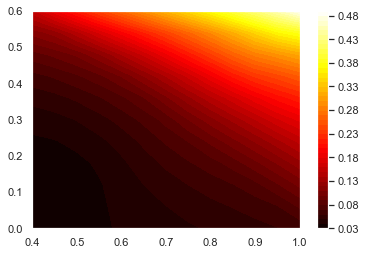

<Figure size 720x360 with 0 Axes>

,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0.60,0.156250,0.186149,0.214264,0.241287,0.267681,0.293772,0.319798,0.345933,0.372315,0.399051,0.426226,0.453912,0.482168
0.54,0.113587,0.124234,0.146153,0.170810,0.194232,0.217717,0.241482,0.265695,0.290488,0.315969,0.342229,0.366848,0.382341
0.48,0.085485,0.092707,0.102052,0.118650,0.140000,0.162740,0.187142,0.212941,0.237198,0.262488,0.283578,0.297342,0.311857
0.42,0.066418,0.071322,0.078218,0.087025,0.100469,0.119567,0.140273,0.162808,0.187368,0.211872,0.232113,0.245135,0.258982
0.36,0.053273,0.056574,0.061771,0.068766,0.077550,0.089264,0.107107,0.126756,0.146620,0.166338,0.186580,0.203836,0.217166


In [22]:
# print(aux1[::-1][:])
# fig, ax = plt.subplots()
# gr=ax.contourf(D1_r, D2_r[::-1], aux1[::-1][:], 50, cmap='hot')#,vmin=6.9,vmax=30)  #'RdYlBu'
# fig.colorbar(gr)
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(5)

# plt.show()
# Prueba=pd.DataFrame(aux1[::-1][:],D2_r[::-1],D1_r)
# Prueba.head()

###### [ONLY CONSIDERING MOSFET LOSSES] It makes sense that an increment in the Rdson of M1 (Buck MOSFET) gives the above result. As  D1 is increased, while keeping D2 constant, means that the static gain is increased. The output voltage remains constant, so the input voltage is decreased. As it is decreased, the current is increased, and it is driven for more time. Consequently, the conduction losses are increased.
###### In the same way, if D1 is fixed and D2 is increased, the input voltage is decreased, so for the same reason, conduction losses are increased.
###### Both effects combined, lead to the diagonal in the differential losses.
En general, cambiando los valores de MOSFET escogidos, se puede ver que las diferencias (evoluciones de rendimientos) cambian. Por lo tanto, es posible discernir, en función del plano de rendimientos, qué está pasando con las Rdson.

# Health Monitoring sobre el modelo desarrollado

## Definición de funciones empleadas en esta sección

## Evolución de las pérdidas a lo largo de la línea de rendimiento óptimo
###### Se debe tener en cuenta que podría fijarse cualquier punto de funcionamiento siempre que la ganancia sea la deseada. (pendiente de la línea que une el punto de funcionamiento con el punto de la gráfica [0,1] (sobre el eje Y ). Si no pudiese fijjarse y se debiera operar siempre en la zona de rendimiento máximo, es interesante ver si la línea de funcionamiento a lo largo del rendimiento máximo es también una buena medida de las variaciones y permite predecir qué RDson está subiendo más de la cuenta.

### Definición de valores para esta sección

La variación de pérdidas en función de la ganancia

REVISAR EL ARTÏCULO Online Health Monitoring in Digitally Controlled Power Converters


https://realpython.com/linear-regression-in-python/#what-is-regression

¿Qué quiero hacer?
Yo puedo calcular datos por un modelo complejo de cómo evoluciona la curva de pérdidas en función de la ganancia según se van envejeciendo los MOSFETs por independiente. Sería un modelo 3D donde el eje X es ganacia, como las gráficas de arriba y el eje Y es la variación de Rdson MOSFET1, por ejemplo. Sacaría, con cada MOSFET. un plano, para un total de 4.
Podría sacar una función de pérdidas por mínimos cuadrados tomando puntos en cada uno de esos planos, para un total de 4 funciones dependientes de Rdsoni y ganancia.
Las pérdidas totales no serían la suma de las cuatro funciones. Esas 4 funciones, menos las pérdidas de base, serían el incremento.

### Generación de matriz datos por MOSFET de cómo cambian las pérdidas



### Ejemplo de un envejecimiento determinado y estimación de sus coeficientes

### Generación de 10 casos aleatorios de envejecimiento y errores de estimación resultantes

## Evolución de las pérdidas a lo largo de línea de ganacia predefinida


### Generación de matriz datos por MOSFET de cómo cambian las pérdidas (para D2nom)

### Ejemplo de uso

### Análisis de 10 casos de estudio

## Análisis de evolución sobre una línea de ganacia fija pero duties cambiantes 

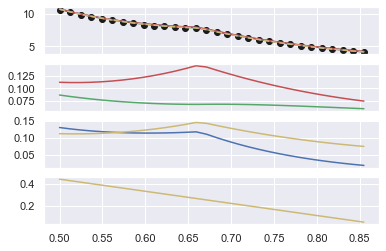

In [37]:
#currucu=[ [ 0 for plas in range(size_D1) ] for plis in range(size_D2) ]

NUEVO EMPIEZA AQUI

INTERVALS ETC AQUI

In [396]:
##FUNCTIONS MODIFIED
# 
#  GANANCIA ESTÁTICA, TENSIÓN DE SALIDA ESTÁTICA
def Gain(D1,D2):
    return D1/(1-D2)

def Vin_f(Vout,D1,D2):
    return Vout*(1-D2)/D1

def D2_f(Vin,Vout,D1):
    return 1-Vin/Vout*D1

def D1_f(Vin,Vout,D2):
    return (1-D2)*Vout/Vin


# EVOLUCIÓN DE CORRIENTES POR INTERVALOS

# Este primer período siempre es igual
def Ip1(t,L,Vin,Vout,I1,phi,D1,D2):
    return I1+(Vin-Vout)*t/L

#El segundo período depende de phi+D2 respecto a D1 en su límite de validez, pero no en la ecuación.
def Ip2(t,L,Vin,Vout,I2,phi,D1,D2):
    return np.where(phi<D1,I2+Vin*t/L,I2-Vout*t/L)
    # if (phi<D1):
    #     return I2+Vin*t/L
    # else:
    #     return I2-Vout*t/L

#El tercer período depende de phi+D2 respecto a D1. 
def Ip3(t,L,Vin,Vout,I3,phi,D1,D2):
    return np.where(phi+D2<D1,I3+(Vin-Vout)*t/L,I3+t*0)
    # if phi+D2<D1:
    #     return I3+(Vin-Vout)*t/L
    # else:
    #     return I3+t*0

# Este último período siempre es igual
def Ip4(t,L,Vin,Vout,I4,phi,D1,D2):
    return I4-Vout*t/L



# DEFINICIÓN DE INTERVALOS DE TIEMPO DE CADA PERIODO
# Son funciones auxiliares empleadas por la siguiente función. Generan conjuntos de puntos. Es en general,
#no solo para este caso de 4-switch buuck-boost

def t1(D1,D2,phi,T):


    # print(np.linspace(0,T*phi).shape)
    # print(np.linspace(0,T*D1x).shape)
    #print(phi.shape)
    return np.where(phi<D1,np.linspace(0,T*phi),np.linspace(0,T*D1))
    # if (phi<D1):
    #     return np.linspace(0,T*phi)
    # else:
    #     return np.linspace(0,T*D1)
def t2(D1,D2,phi,T):
    # phi=phi*np.ones((D1.shape,D2.shape))
    return np.where(phi>D1,np.linspace(T*D1,T*phi),np.where(D2+phi>D1,np.linspace(T*phi,D1*T),np.linspace(T*phi,(D2+phi)*T)))
    # if (phi>D1):
    #     return np.linspace(T*D1,phi*T)
    # elif (D2+phi>D1):
    #     return np.linspace(T*phi,D1*T)
    # else:
    #     return np.linspace(T*phi,(D2+phi)*T)

def t3(D1,D2,phi,T):
    # phi=phi*np.ones((D1.shape,D2.shape))
    return np.where(phi>D1,np.linspace(T*phi,(D2+phi)*T),np.where(D2+phi>D1,np.linspace(D1*T,(D2+phi)*T),np.linspace((D2+phi)*T,D1*T)))
    # if (phi>D1):
    #     return np.linspace(phi*T,(D2+phi)*T)
    # elif D2+phi>D1:
    #     return np.linspace(D1*T,(D2+phi)*T)
    # else:
    #     return np.linspace((D2+phi)*T,D1*T)
def t4(D1,D2,phi,T):
    # phi=phi*np.ones((D1.shape,D2.shape))
    return np.where( D2+phi>D1,np.linspace((D2+phi)*T,T),np.linspace(D1*T,T))
    # if D2+phi>D1:
    #     return np.linspace((D2+phi)*T,T)
    # else:
    #     return np.linspace(D1*T,T)
    

# Esta función devuelve los intervalos de tiempo t1 a t4 y los valores de comienzo y de final dedichos intervalos.
#Es decir, devuelve 12 elementos, agrupados de 3 en 3. 
# Validada de forma indirecta mediante la ecuación Iind_avg. SE DEBE MEJORAR LA VALIDACIÓN
def intervals(D1,D2,phi,T):
    t1_x=t1(D1,D2,phi,T).T
    df1=pd.DataFrame(t1_x)
    columns=['t1_'+str(i) for i in range(df1.shape[1])]
    df1.columns=columns
    t1_ini=t1_x[:,0]
    df1['t1_ini']=t1_ini
    t1_end = t1_x[:,- 1]
    df1['t1_end']=t1_end
    # col1=['t'+ str(i) for i in range (df1t.shape[1])]
    # col1=[i for i in range (df1.shape[1])]
    # col2=['t1' for i in range (len(col1))]
    # columns=pd.MultiIndex.from_arrays([col2,col1])

    # df1.columns=columns
    # t1_ini=t1_x[:,0]
    # print(t1_ini.shape)
    # df1['t1','t1_ini']=t1_ini
    # t1_end = t1_x[:,- 1]
    # df1['t1','t1_end']=t1_end

    t2_x=t2(D1,D2,phi,T).T
    t2_ini=t2_x[:,0]
    t2_end = t2_x[:,- 1]
    df2=pd.DataFrame(t2_x)
    columns=['t2_'+str(i) for i in range(df2.shape[1])]
    df2.columns=columns
    df2['t2_ini']=t2_ini
    df2['t2_end']=t2_end
    # col1=['t'+ str(i) for i in range (df1t.shape[1])]
    # col1=[i for i in range (df2.shape[1])]
    # col2=['t2' for i in range (len(col1))]
    # columns=pd.MultiIndex.from_arrays([col2,col1])

    # df2.columns=columns
    # t2_ini=t2_x[:,0]
    # df2['t2','t2_ini']=t2_ini
    # t2_end = t2_x[:,- 1]
    # df2['t2','t2_end']=t2_end

    t3_x=t3(D1,D2,phi,T).T
    t3_ini=t3_x[:,0]
    t3_end = t3_x[:,- 1]
    df3=pd.DataFrame(t3_x)
    columns=['t3_'+str(i) for i in range(df3.shape[1])]
    df3.columns=columns   
    df3['t3_ini']=t3_ini
    df3['t3_end']=t3_end
    # col1=['t'+ str(i) for i in range (df1t.shape[1])]
    # col1=[i for i in range (df3.shape[1])]
    # col2=['t3' for i in range (len(col1))]
    # columns=pd.MultiIndex.from_arrays([col2,col1])

    # df3.columns=columns
    # t3_ini=t3_x[:,0]
    # df3['t3','t3_ini']=t3_ini
    # t3_end = t3_x[:,- 1]
    # df3['t3','t3_end']=t3_end

    t4_x=t4(D1,D2,phi,T).T
    t4_ini=t4_x[:,0]
    t4_end = t4_x[:,- 1]    
    df4=pd.DataFrame(t4_x)
    # col1=['t'+ str(i) for i in range (df1t.shape[1])]
    # col1=[i for i in range (df4.shape[1])]
    # col2=['t4' for i in range (len(col1))]
    # columns=pd.MultiIndex.from_arrays([col2,col1])
   
    # df4.columns=columns
    # t4_ini=t1_x[:,0]
    # df4['t4','t4_ini']=t4_ini
    # t4_end = t4_x[:,- 1]
    # df4['t4','t4_end']=t4_end
    columns=['t4_'+str(i) for i in range(df4.shape[1])]
    df4.columns=columns
    df4['t4_ini']=t4_ini
    df4['t4_end']=t4_end
    tdf=pd.concat([df1,df2,df3,df4],axis='columns')
    return t1_x,t1_ini,t1_end,t2_x,t2_ini,t2_end,t3_x,t3_ini,t3_end,t4_x,t4_ini,t4_end,tdf
    

# VALORES DE CORRIENTE MEDIA, DE COMIENZO, ETC

# Valor medio de corriente por bobina
# Se debe indicar los valores de corriente al comienzo de cada intervalo y la duración de cada uno de dichos intervalos
# OK Validada en el ejemplo, lo que de forma indirecta valida también la ecuación anterior.
def Iind_avg(I1_ini,I2_ini,I3_ini,I4_ini,T1,T2,T3,T4):
    return 0.5*((I1_ini)*(T4+T1)+I2_ini*(T1+T2)+I3_ini*(T2+T3)+I4_ini*(T3+T4))/(T1+T2+T3+T4)


# Valor final de cada intervalo de corriente por la bobina
# Se debe dar la bobina, tensiones de entrada y salida, el valor de comienzo del periodo I1_ini, ciclos de trabajo,
# desfase y periodo

def currents(L,Vin,Vout,I1_ini,D1,D2,phi,T):
    t=intervals(D1,D2,phi,T)
    Ip4_end=I1_ini
    Ip1_end=Ip1(t[2],L,Vin,Vout,I1_ini,phi,D1,D2)
    Ip2_end=Ip2(t[5]-t[2],L,Vin,Vout,Ip1_end,phi,D1,D2)
    Ip3_end=Ip3(t[8]-t[5],L,Vin,Vout,Ip2_end,phi,D1,D2)
    ipdf=pd.DataFrame({'Ip1_end':Ip1_end,'Ip2_end':Ip2_end,'Ip3_end':Ip3_end,'Ip4_end':Ip4_end})
    return Ip1_end,Ip2_end,Ip3_end,Ip4_end,ipdf

# Corriente inicial del periodo (no de un intervalo):
def Iini(L,Vin,Iin,Vout,D1,D2,phi,T):
    c=currents(L,Vin,Vout,0,D1,D2,phi,T)
    # print(pd.DataFrame(c))
    i=intervals(D1,D2,phi,T)
    A1=np.where(c[3]>0,0.5*(c[0]-0)*(i[2]-i[1])+0.5*np.abs(c[1]+c[0])*(i[5]-i[4])+np.minimum(c[0],c[1])*(i[5]-i[4])+0.5*np.abs(c[2]-c[1])*(i[8]-i[7])+np.minimum(c[2],c[1])*(i[8]-i[7])+0.5*c[2]*(i[11]-i[10]),0.5*(c[0]-0)*(i[2]-i[1])+0.5*np.abs(c[1]+c[0])*(i[5]-i[4])+np.minimum(c[0],c[1])*(i[5]-i[4])+0.5*np.abs(c[2]-c[1])*(i[8]-i[7])+np.minimum(c[2],c[1])*(i[8]-i[7])+0.5*c[2]*(i[11]-i[10]))

    # if (c[3]>0):
    #     A1=0.5*(c[0]-0)*(i[2]-i[1])+0.5*abs(c[1]+c[0])*(i[5]-i[4])+min(c[0],c[1])*(i[5]-i[4])+0.5*abs(c[2]-c[1])*(i[8]-i[7])+min(c[2],c[1])*(i[8]-i[7])+0.5*c[2]*(i[11]-i[10])
    # else:
    #     A1=0.5*(c[0]-0)*(i[2]-i[1])+0.5*abs(c[1]+c[0])*(i[5]-i[4])+min(c[0],c[1])*(i[5]-i[4])+0.5*abs(c[2]-c[1])*(i[8]-i[7])+min(c[2],c[1])*(i[8]-i[7])+0.5*c[2]*(i[11]-i[10])
    # #Iini=(Iin*T/D1-A1)/T
    Iini=Iin/D1-A1/T
    return Iini

# Se basa en la anterior, current function, pero sin dar valor inicial
def currents_L(L,Vin,Vout,Iin,D1,D2,phi,T):
    t=intervals(D1,D2,phi,T)
    Ip4_end=Iini(L,Vin,Iin,Vout,D1,D2,phi,T)
    Ip1_end=Ip1(t[2],L,Vin,Vout,Ip4_end,phi,D1,D2)
    Ip2_end=Ip2(t[5]-t[2],L,Vin,Vout,Ip1_end,phi,D1,D2)
    Ip3_end=Ip3(t[8]-t[5],L,Vin,Vout,Ip2_end,phi,D1,D2)
    ipdf=pd.DataFrame({'Ip1_end':Ip1_end,'Ip2_end':Ip2_end,'Ip3_end':Ip3_end,'Ip4_end':Ip4_end})
    return Ip1_end,Ip2_end,Ip3_end,Ip4_end,ipdf

# Valor eficaz y valor medio de un intervalo (no del período completo)
def Irms_sec(fsw,tfin,tini,Ifin,Iini):
    dt=tfin-tini
    dI=(Ifin-Iini)
    return np.sqrt(fsw*(Iini**2*dt+Iini*dI*dt+dI**2*dt/3))

def Iavg_sec(fsw,tfin,tini,Ifin,Iini):
    dt=tfin-tini
    dI=Ifin-Iini
    return 0.5*(Iini+Ifin)*(tfin-tini)*fsw

def Irms_Mi(D1,D2,phi,fsw,tfin1,tfin2,tfin3,tfin4,tini1,Ifin1,Ifin2,Ifin3,Ifin4):
    Irms_M1=np.where(phi+D2>D1,np.sqrt(Irms_sec(fsw,tfin1,tini1,Ifin1,Ifin4)**2+Irms_sec(fsw,tfin2,tfin1,Ifin2,Ifin1)**2),np.sqrt(Irms_sec(fsw,tfin1,tini1,Ifin1,Ifin4)**2+Irms_sec(fsw,tfin2,tfin1,Ifin2,Ifin1)**2+Irms_sec(fsw,tfin3,tfin2,Ifin3,Ifin2)**2))
    Irms_M2=np.where(phi+D2>D1,np.sqrt(Irms_sec(fsw,tfin3,tfin2,Ifin3,Ifin2)**2+Irms_sec(fsw,tfin4,tfin3,Ifin4,Ifin3)**2),np.sqrt(Irms_sec(fsw,tfin4,tfin3,Ifin4,Ifin3)**2))
    Irms_M3=np.where(phi+D2>D1,np.sqrt(Irms_sec(fsw,tfin1,tini1,Ifin1,Ifin4)**2+Irms_sec(fsw,tfin4,tfin3,Ifin4,Ifin3)**2),np.sqrt(Irms_sec(fsw,tfin1,tini1,Ifin1,Ifin4)**2+Irms_sec(fsw,tfin4,tfin3,Ifin4,Ifin3)**2+Irms_sec(fsw,tfin3,tfin2,Ifin3,Ifin2)**2))
    Irms_M4=np.where(phi+D2>D1,np.sqrt(Irms_sec(fsw,tfin2,tfin1,Ifin2,Ifin1)**2+Irms_sec(fsw,tfin3,tfin2,Ifin3,Ifin2)**2),np.sqrt(Irms_sec(fsw,tfin2,tfin1,Ifin2,Ifin1)**2))
        
    return Irms_M1,Irms_M2,Irms_M3,Irms_M4


In [44]:
def R_interpol (M_i,temp):
    R25=float(MOSFETs.loc[M_i,'Rdson (ohms @25oC)'])# If Part is set as index then it could be used: Dataframe.loc[MOSFET_NAME,'Rdson (ohms @25oC)']
    R125=float(MOSFETs.loc[M_i,'Rdson (ohms @125oC)'])#Dataframe.loc[MOSFET_NAME,'Rdson (ohms@125oC)']
   
    temp_value = np.array([25,125])
    R_value = np.array([R25,R125])
    R_interp = scipy.interpolate.interp1d(temp_value, R_value,kind="slinear")
    temp_new = np.linspace(25, 125, 1000)
    return R_interp(temp)

def cond_losses_temp(sw_losses,cond_losses25,M_i,Irms,aging,Rjc,Rca,Tini,Tmax):
    
    cond_losses=cond_losses25
    losses=sw_losses+cond_losses25
    iteration=0
    temp=Tini
    temp_end=temp+0.2
    print('iteration',iteration)
    print('temp',temp)
    print('cond losses',cond_losses25,losses)
    print('\n')
    print('\n')
    while ((temp_end)>temp+0.1 or (temp_end)<temp-0.1):
        print('temp_end-temp',temp_end-temp)
        iteration=iteration+1
        temp=temp+0.1#incr_temp
        cond_losses=MD.cond_losses(aging*R_interpol(M_i,temp),Irms)   
        losses=sw_losses+cond_losses
        temp_end=temp+losses*(Rjc+Rca)
        print('iteration',iteration)
        print('new R',R_interpol(M_i,temp))
        print ('cond_losses',cond_losses)
        print ('sw_losses',sw_losses)
        print('temp_end is ',temp_end)
        print('temp',temp)
        print('\n')
        if (temp_end>Tmax):
            break
    return cond_losses


#MOSFET de Buck
def Losses_M1(D1,Vin,Ion,Ioff,fsw,M_i,Vdr,Idr,Irms,aging):
#Si no conmuta, sólo hay pérdidas de conducción
    losses_sw=0  
    losses_sw1=MD.sw_losses(Vin,Ion,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)+MD.sw_losses(Vin,Ioff,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)
    losses_sw2=MD.gate_sw_losses(MOSFETs['Qg (nC)'][M_i]*10**-9,Vdr,fsw)
    losses_sw3=MD.Coss_sw_losses(MOSFETs['Coss (pF)'][M_i]*10**-12,Vin,fsw)
    losses_cond=MD.cond_losses(aging*MOSFETs['Rdson (ohms @25oC)'][M_i],Irms)    
    return np.where(D1==1,losses_sw+losses_cond,np.where(D1==0,0,losses_sw1+losses_sw2+losses_sw3+losses_cond))

#     if (D1==1):
# # Si conmuta, hay pérdidas de conducción y conmutación. Además, este dispositivo no conmuta con ZVS en encenddo ni ZCS en apagado



# DIODO de Buck        
def Losses_M2(D1,Vin,Ion,Ioff,fsw,M_i,Vdr,Idr,Irms,aging):
    losses_sw1=MD.sw_losses(Vin,Ioff,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)
    losses_sw2=MD.gate_sw_losses(MOSFETs['Qg (nC)'][M_i]*10**-9,Vdr,fsw)
    losses_sw3=MD.Coss_sw_losses(MOSFETs['Coss (pF)'][M_i]*10**-12,Vin,fsw)
    losses_cond=MD.cond_losses(aging*MOSFETs['Rdson (ohms @25oC)'][M_i],Irms)
    losses_tot=losses_sw1+losses_sw2+losses_sw3+losses_cond
    return np.where((D1==1)|(D1==0),0,losses_tot)
# #Si no conmuta, no hay pérdidas porque está en abierto
# # Si conmuta, hay pérdidas de conducción y conmutación. Pero este dispositivo conmuta con ZVS en encenddo


    
#DIODO de Boost
def Losses_M3(D2,Vout,Ion,Ioff,fsw,M_i,Vdr,Idr,Irms,aging):
    losses_sw=0
    losses_sw1=MD.sw_losses(Vout,Ioff,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)
    losses_sw2=MD.gate_sw_losses(MOSFETs['Qg (nC)'][M_i]*10**-9,Vdr,fsw)
    losses_sw3=MD.Coss_sw_losses(MOSFETs['Coss (pF)'][M_i]*10**-12,Vout,fsw)
    losses_cond=MD.cond_losses(aging*MOSFETs['Rdson (ohms @25oC)'][M_i],Irms)
    return np.where(D2==0,losses_sw+losses_cond,np.where(D2==1,0,losses_sw1+losses_sw2+losses_sw3+losses_cond))

# # Si conmuta, hay pérdidas de conducción y conmutación. Además, este dispositivo conmuta con ZVS en encenddo

    
#MOSFET de Boost
def Losses_M4(D2,Vout,Ion,Ioff,fsw,M_i,Vdr,Idr,Irms,aging):
    losses_sw1=MD.sw_losses(Vout,Ion,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)+MD.sw_losses(Vout,Ioff,fsw,MOSFETs['Qg (nC)'][M_i]*10**-9,Idr)
    losses_sw2=MD.gate_sw_losses(MOSFETs['Qg (nC)'][M_i]*10**-9,Vdr,fsw)
    losses_sw3=MD.Coss_sw_losses(MOSFETs['Coss (pF)'][M_i]*10**-12,Vout,fsw)
    losses_cond=MD.cond_losses(aging*MOSFETs['Rdson (ohms @25oC)'][M_i],Irms)
    losses_tot=losses_sw1+losses_sw2+losses_sw3+losses_cond    
    return np.where((D2==0) | (D2==1),0,losses_tot)

# # Si conmuta, hay pérdidas de conducción y conmutación. Además, este dispositivo no conmuta con ZVS en encenddo ni ZCS en apagado

    
    
#MOSFET DE PROTECCION AÑADIDO
def Losses_prot(M_i,Irms,aging):
    losses_cond=MD.cond_losses(aging/2*MOSFETs['Rdson (ohms @25oC)'][M_i],Irms)
    losses_tot=losses_cond
    return losses_tot
#HACER PARA MAGNÉTICO

def Losses_ind(c,x,y,Vol,fsw,L,Iac,N,Ae,Irms,Awire,Lwire,rho):
    Bac=L*Iac/2/N/Ae*1000
    losses_sw=MGD.core_losses(c,x,y,Bac,fsw,Vol)
    losses_cond=MGD.copper_losses(Irms,Awire,Lwire,rho)
    return losses_cond+losses_sw

# Valores típicos de c,x,y
(6.198074738669944, 1.7205492791242043, 2.736106449242652)
A=Losses_ind(6.198/10000000000000, 1.721, 2.736,0.000004,180000,84/1000000,6.61,40,0.00006,5.35,0.00009*0.3/40,40*0.056,1/57000000)


EL HEATMAP

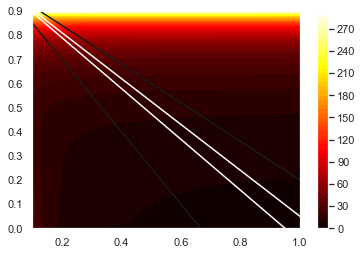

<Figure size 720x360 with 0 Axes>

In [400]:
D1_r=np.linspace(D1_min_sh,D1_max_sh,size_D1)
D2_r=np.linspace(D2_min_sh,D2_max_sh,size_D2)
from itertools import product
from typing import ValuesView
values = np.array(list(product(D1_r,D2_r))) #to get all possible combinations

df_hm=pd.DataFrame(values)
df_hm.columns=['D1','D2']
D1_r=df_hm.loc[:,'D1']
D2_r=df_hm.loc[:,'D2']
phi_bob=83.5e-6
phi_bob=phi_bob*np.ones(df_hm.shape[0])
fsw=180e3
T=1/fsw
P=500
Vbus=100
L_ind=83.5e-6
# df_hm['D1']=D1_r
# df_hm['D2']=D2_r
df_hm['Gain']=D1_r/(1-D2_r)
df_hm['phi']=phi_bob*np.ones(df_hm.shape[0])
df_hm['T']=T*np.ones(df_hm.shape[0])
df_hm['fsw']=fsw*np.ones(df_hm.shape[0])
df_hm['L']=L_ind*np.ones(df_hm.shape[0])
df_hm['Vin']=Vbus*np.ones(df_hm.shape[0])/df_hm.loc[:,'Gain']
df_hm['Vbus']=Vbus*np.ones(df_hm.shape[0])
df_hm['P']=P*np.ones(df_hm.shape[0])
df_hm['Iin(A)']=P/(Vbus/df_hm.loc[:,'Gain'])

fig, ax = plt.subplots()

c=currents_L(df_hm['L'],df_hm['Vin'],Vbus,df_hm['Iin(A)'],D1_r,D2_r,phi_bob,T)
interv=intervals(D1_r,D2_r,phi_bob,T)
# intervdf=pd.DataFrame(interv[-1])
Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(D1_r,D2_r,phi_bob,fsw,interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
aux_M1=Losses_M1(D1_r,Vin_f(Vbus,D1_r,D2_r),c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,aging)
aux_M2=Losses_M2(D1_r,Vin_f(Vbus,D1_r,D2_r),c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,aging)
aux_M3=Losses_M3(D2_r,Vbus,c[2],c[0],fsw,M3_index,Vdrvr,Idrvr,Irms_M3,aging)
aux_M4=Losses_M4(D2_r,Vbus,c[0],c[2],fsw,M4_index,Vdrvr,Idrvr,Irms_M4,aging)
Iac_ind=c[-1].max(axis=1)-c[-1].min(axis=1) #Validated with other implementation. Works
df_hm_los=df_hm.copy()
df_hm_los['Iac_ind']=Iac_ind
Iavg_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
Irms1=Irms_sec(1/T,interv[2],interv[1],c[0],c[3])
Irms2=Irms_sec(1/T,interv[5],interv[4],c[1],c[0])
Irms3=Irms_sec(1/T,interv[8],interv[7],c[2],c[1])
Irms4=Irms_sec(1/T,interv[11],interv[10],c[3],c[2])
Irms_ind=np.sqrt(Irms1**2+Irms2**2+Irms3**2+Irms4**2)
df_hm_los['Irms_ind']=Irms_ind
df_hm_los['Ipk_ind']=c[-1].max(axis=1)
df_hm_los['Iavg']=(c[-1].max(axis=1)+c[-1].min(axis=1))/2
aux_L=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
aux=aux_M1+aux_M2+aux_M3+aux_M4+aux_L
losses=aux
df_hm_los['Losses']=losses
df_hm_los['aux_M1']=aux_M1
df_hm_los['aux_M2']=aux_M2
df_hm_los['aux_M3']=aux_M3
df_hm_los['aux_M4']=aux_M4
df_hm_los['aux_L']=aux_L


heat=df_hm_los.loc[:,['D1','D2','Losses']]
heat=heat.set_index('D2')
heat=heat.pivot(columns='D1')
heat_val=heat.values
D1_x=heat.columns.get_level_values(1)
D2_y=heat.index.values


#Plot the surface.
gr=ax.contourf(D1_x, D2_y, heat_val, 50, cmap='hot')#,vmin=6.9,vmax=30)  #'RdYlBu'
fig.colorbar(gr)

# Las líneas negras representan las parejas de puntos que dan la mínima y máxima ganancia necesarias.
ax.plot(D1_r,D2_f(Vsa_max,Vbus,D1_r),'k')
ax.plot(D1_r,D2_f(Vsa_min,Vbus,D1_r),'k')

# Las líneas blancas representan la ganancia máxima que podría alcanzarse si se imponen límites del 0.95 a D1 y D2.
# Es decir, se puede fijar un D de 1 o menor de 0.95,pero nunca entre ambos valores por provlemas con retrassos, tiempos
#muertos, etc.

ax.plot(D1_r,D2_f(Vbus,Lim_sup_D1*Vbus,D1_r),'w')
ax.plot(D1_f(Vbus*(1-Lim_inf_D2),Vbus,D2_r),D2_r,'w')


#ax.plot(D1_r,D2_r,'g')
plt.xlim(D1_min_sh,D1_max_sh)
plt.ylim(D2_min_sh,D2_max_sh)


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.show()


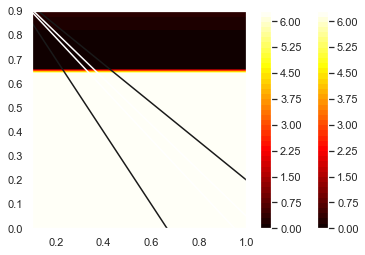

<Figure size 720x360 with 0 Axes>

In [393]:
fig, ax = plt.subplots()

c=currents_L(df_hm['L'],df_hm['Vin'],Vbus,df_hm['Iin(A)'],D1_r,D2_r,phi_bob,T)
interv=intervals(D1_r,D2_r,phi_bob,T)
# intervdf=pd.DataFrame(interv[-1])
Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(D1_r,D2_r,phi_bob,fsw,interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
aux_M1_1=Losses_M1(D1_r,Vin_f(Vbus,D1_r,D2_r),c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,aging_extra)
aux_M2_1=Losses_M2(D1_r,Vin_f(Vbus,D1_r,D2_r),c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,aging_extra)
aux_M3_1=Losses_M3(D2_r,Vbus,c[2],c[0],fsw,M3_index,Vdrvr,Idrvr,Irms_M3,aging)
aux_M4_1=Losses_M4(D2_r,Vbus,c[0],c[2],fsw,M4_index,Vdrvr,Idrvr,Irms_M4,aging)
Iac_ind=c[-1].max(axis=1)-c[-1].min(axis=1) #Validated with other implementation. Works
df_hm_los1=df_hm.copy()
df_hm_los1['Iac_ind']=Iac_ind
Iavg_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
Irms1=Irms_sec(1/T,interv[2],interv[1],c[0],c[3])
Irms2=Irms_sec(1/T,interv[5],interv[4],c[1],c[0])
Irms3=Irms_sec(1/T,interv[8],interv[7],c[2],c[1])
Irms4=Irms_sec(1/T,interv[11],interv[10],c[3],c[2])
Irms_ind=np.sqrt(Irms1**2+Irms2**2+Irms3**2+Irms4**2)
df_hm_los1['Irms_ind']=Irms_ind
df_hm_los1['Ipk_ind']=c[-1].max(axis=1)
df_hm_los1['Iavg']=(c[-1].max(axis=1)+c[-1].min(axis=1))/2
aux_L_1=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
aux1=aux_M1_1+aux_M2_1+aux_M3_1+aux_M4_1+aux_L_1-aux
losses=aux_M1_1+aux_M2_1+aux_M3_1+aux_M4_1+aux_L_1
loss_difference=aux1
df_hm_los1['Losses']=losses
df_hm_los1['Loss_diff']=loss_difference
df_hm_los1['aux_M1']=aux_M1
df_hm_los1['aux_M2']=aux_M2
df_hm_los1['aux_M3']=aux_M3
df_hm_los1['aux_M4']=aux_M4
df_hm_los1['aux_L']=aux_L
# small_loses=df_hm_los1.loc[df_hm_los1['Loss_diff']]
df_hm_los1['Small losses']=df_hm_los1['Loss_diff'].mask(df_hm_los1['Loss_diff']<0.5 ,100)

heat=df_hm_los1.loc[:,['D1','D2','Loss_diff']]
heat=heat.set_index('D2')
heat=heat.pivot(columns='D1')
heat_val=heat.values
D1_x=heat.columns.get_level_values(1)
D2_y=heat.index.values

impossible_values=df_hm_los1.loc[:,['D1','D2','Small losses']]
impossible_values=impossible_values.set_index('D2')
impossible_values=impossible_values.pivot(columns='D1')
impossible_values_val=impossible_values.values
D1_x=impossible_values.columns.get_level_values(1)
D2_y=impossible_values.index.values

#Plot the surface.
gr=ax.contourf(D1_x, D2_y, heat_val, 50, cmap='hot')#,vmin=6.9,vmax=30)  #'RdYlBu'
fig.colorbar(gr)

gr_imp=ax.contourf(D1_x, D2_y, impossible_values_val, 50, cmap='hot')#,vmin=6.9,vmax=30)  #'RdYlBu'
fig.colorbar(gr)


# Las líneas negras representan las parejas de puntos que dan la mínima y máxima ganancia necesarias.
ax.plot(D1_r,D2_f(Vsa_max,Vbus,D1_r),'k')
ax.plot(D1_r,D2_f(Vsa_min,Vbus,D1_r),'k')

# Las líneas blancas representan la ganancia máxima que podría alcanzarse si se imponen límites del 0.95 a D1 y D2.
# Es decir, se puede fijar un D de 1 o menor de 0.95,pero nunca entre ambos valores por provlemas con retrassos, tiempos
#muertos, etc.

ax.plot(D1_r,D2_f(Vbus,Lim_sup_D1*Vbus,D1_r),'w')
ax.plot(D1_f(Vbus*(1-Lim_inf_D2),Vbus,D2_r),D2_r,'w')


#ax.plot(D1_r,D2_r,'g')
plt.xlim(D1_min_sh,D1_max_sh)
plt.ylim(D2_min_sh,D2_max_sh)


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.show()



In [389]:
df_hm_los
# casper=df_hm_los.loc[:,['D1','D2','Losses']]
# casper=casper.set_index('D1')
# casper=casper.pivot(columns='D2')
# casper.columns.values

,D1,D2,Gain,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Iac_ind,Irms_ind,Ipk_ind,Iavg,Losses,aux_M1,aux_M2,aux_M3,aux_M4,aux_L
0,0.1,0.000000,0.100000,0.000083,0.000006,180000.0,0.000083,1000.000000,100.0,500.0,0.500000,5.988024,5.290372,7.994012,5.000000,28.729350,12.723395,12.696621,0.769671,0.000000,2.539663
1,0.1,0.018367,0.101871,0.000083,0.000006,180000.0,0.000083,981.632653,100.0,500.0,0.509356,5.988024,5.378241,8.082499,5.088487,29.099302,12.722467,12.321950,0.995189,0.465455,2.594240
2,0.1,0.036735,0.103814,0.000083,0.000006,180000.0,0.000083,963.265306,100.0,500.0,0.519068,5.988024,5.470472,8.176803,5.182791,28.809904,12.702656,11.957561,1.017511,0.479682,2.652494
3,0.1,0.055102,0.105832,0.000083,0.000006,180000.0,0.000083,944.897959,100.0,500.0,0.529158,5.988024,5.566747,8.277131,5.283119,28.518440,12.664508,11.603550,1.035805,0.500220,2.714358
4,0.1,0.073469,0.107930,0.000083,0.000006,180000.0,0.000083,926.530612,100.0,500.0,0.539648,5.988024,5.666833,8.383707,5.389695,28.225570,12.608574,11.260026,1.048782,0.528371,2.779816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1.0,0.826531,5.764706,0.000083,0.000006,180000.0,0.000083,17.346939,100.0,500.0,28.823529,0.953944,28.825224,29.300881,28.823909,97.069309,22.849573,0.000000,5.005790,20.833659,48.380287
2596,1.0,0.844898,6.447368,0.000083,0.000006,180000.0,0.000083,15.510204,100.0,500.0,32.236842,0.871892,32.238221,32.673185,32.237239,120.995134,28.580830,0.000000,5.585400,26.316407,60.512497
2597,1.0,0.863265,7.313433,0.000083,0.000006,180000.0,0.000083,13.673469,100.0,500.0,36.567164,0.785351,36.568281,36.960254,36.567578,155.145414,36.774077,0.000000,6.320484,34.193781,77.857071
2598,1.0,0.881633,8.448276,0.000083,0.000006,180000.0,0.000083,11.836735,100.0,500.0,42.241379,0.694321,42.242287,42.588972,42.241811,206.321248,49.071296,0.000000,7.283377,46.076345,103.890229


In [390]:
df_hm_los1
# df_hm_los1['Loss_diff'].mask(df_hm_los1['Loss_diff']<0.5)

,D1,D2,Gain,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Iac_ind,Irms_ind,Ipk_ind,Iavg,Losses,Loss_diff,aux_M1,aux_M2,aux_M3,aux_M4,aux_L,Small losses
0,0.1,0.000000,0.100000,0.000083,0.000006,180000.0,0.000083,1000.000000,100.0,500.0,0.500000,5.988024,5.290372,7.994012,5.000000,28.799320,0.069970,12.723395,12.696621,0.769671,0.000000,2.539663,NaN
1,0.1,0.018367,0.101871,0.000083,0.000006,180000.0,0.000083,981.632653,100.0,500.0,0.509356,5.988024,5.378241,8.082499,5.088487,29.171615,0.072314,12.722467,12.321950,0.995189,0.465455,2.594240,NaN
2,0.1,0.036735,0.103814,0.000083,0.000006,180000.0,0.000083,963.265306,100.0,500.0,0.519068,5.988024,5.470472,8.176803,5.182791,28.884719,0.074815,12.702656,11.957561,1.017511,0.479682,2.652494,NaN
3,0.1,0.055102,0.105832,0.000083,0.000006,180000.0,0.000083,944.897959,100.0,500.0,0.529158,5.988024,5.566747,8.277131,5.283119,28.595912,0.077472,12.664508,11.603550,1.035805,0.500220,2.714358,NaN
4,0.1,0.073469,0.107930,0.000083,0.000006,180000.0,0.000083,926.530612,100.0,500.0,0.539648,5.988024,5.666833,8.383707,5.389695,28.305852,0.080282,12.608574,11.260026,1.048782,0.528371,2.779816,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1.0,0.826531,5.764706,0.000083,0.000006,180000.0,0.000083,17.346939,100.0,500.0,28.823529,0.953944,28.825224,29.300881,28.823909,99.146543,2.077234,22.849573,0.000000,5.005790,20.833659,48.380287,2.077234
2596,1.0,0.844898,6.447368,0.000083,0.000006,180000.0,0.000083,15.510204,100.0,500.0,32.236842,0.871892,32.238221,32.673185,32.237239,123.593391,2.598257,28.580830,0.000000,5.585400,26.316407,60.512497,2.598257
2597,1.0,0.863265,7.313433,0.000083,0.000006,180000.0,0.000083,13.673469,100.0,500.0,36.567164,0.785351,36.568281,36.960254,36.567578,158.488512,3.343098,36.774077,0.000000,6.320484,34.193781,77.857071,3.343098
2598,1.0,0.881633,8.448276,0.000083,0.000006,180000.0,0.000083,11.836735,100.0,500.0,42.241379,0.694321,42.242287,42.588972,42.241811,210.782275,4.461027,49.071296,0.000000,7.283377,46.076345,103.890229,4.461027


In [45]:
gain_min=Vbus/Vsa_max
gain_max=Vbus/Vsa_min
gain_vert=D1_max/(1-0) #Máxima ganancia que se puede conseguir operando con D2=0 (modo Buck)
gain_horz=1/(1-D2_min) #Mínima ganancia que se puede conseguir operando con D1=1 (modo Boost)


LA PANOJITA

In [46]:
elements=30

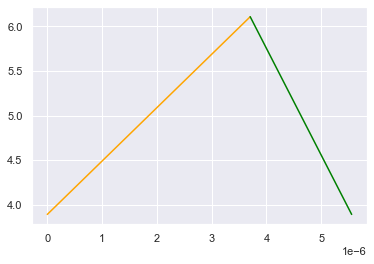

,Gain,D1,D2,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Iac_ind,Irms_ind,Ipk_ind,Iavg,Losses,aux_M1,aux_M2,aux_M3,aux_M4,aux_L
0,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.000000,100.0,500.0,3.333333,2.217787,5.040822,6.108893,5.0,4.052757,1.116964,0.697559,0.698772,0.0,1.539461
1,0.686782,0.686782,0.0,0.0,0.000006,180000.0,0.000083,145.606695,100.0,500.0,3.433908,2.083955,5.036061,6.041977,5.0,4.001412,1.110689,0.666014,0.697452,0.0,1.527256
2,0.706897,0.706897,0.0,0.0,0.000006,180000.0,0.000083,141.463415,100.0,500.0,3.534483,1.950123,5.031592,5.975061,5.0,3.954279,1.105926,0.635919,0.696215,0.0,1.516218
3,0.727011,0.727011,0.0,0.0,0.000006,180000.0,0.000083,137.549407,100.0,500.0,3.635057,1.816291,5.027416,5.908145,5.0,3.911004,1.102521,0.607123,0.695060,0.0,1.506299
4,0.747126,0.747126,0.0,0.0,0.000006,180000.0,0.000083,133.846154,100.0,500.0,3.735632,1.682459,5.023534,5.841229,5.0,3.871276,1.100344,0.579494,0.693987,0.0,1.497452


In [53]:
L_ind=83.5e-6
i=0
losses=[0 for i in range(elements)]
gainr=np.linspace(gain_min,gain_max,elements)
phi_bob=0.4*0
phi_bob=phi_bob*np.ones(elements)
D1x=np.where(gainr<gain_vert,gainr,np.where(gainr<gain_horz,D1_max,1))
D2x=np.where(gainr<gain_vert,0,1-D1x/gainr)
Vbus=Vbus
Vin=Vbus/gainr
fsw=180000
T=1/fsw
#We create a dataframe and add the different values
df=pd.DataFrame(columns=['Gain','D1','D2'])
df['Gain']=gainr
df['D1']=D1x
df['D2']=D2x
df['phi']=phi_bob*np.ones(df.shape[0])
df['T']=T*np.ones(df.shape[0])
df['fsw']=fsw*np.ones(df.shape[0])
df['L']=L_ind*np.ones(df.shape[0])
df['Vin']=Vbus*np.ones(df.shape[0])/gainr
df['Vbus']=Vbus*np.ones(df.shape[0])
df['P']=P*np.ones(df.shape[0])
df['Iin(A)']=P/(Vbus/gainr)
# df_Gain=df.set_index('Gain')
Iin=df['Iin(A)'].to_numpy()


#change to multiindex with D1 and D2 because this way it would be easier to develop the heatmap
indexmap=pd.MultiIndex.from_arrays([df['D1'],df['D2']],names=('D1','D2'))
df1mi=df
df1mi=df1mi.drop(columns=['D1','D2'])
df1mi.index=indexmap
pd.Series(indexmap.get_level_values(0)) #If I use d1 and d2 as multiindex, it is to get those indexes to use them in t1

c=currents_L(df['L'],df['Vin'],Vbus,df['Iin(A)'],D1x,D2x,phi_bob,T)

interv=intervals(D1x,D2x,phi_bob,T)
intervdf=pd.DataFrame(interv[-1])
Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(D1x,D2x,phi_bob,fsw,interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
aux_M1=Losses_M1(D1x,Vbus/gainr,c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,aging)
aux_M2=Losses_M2(D1x,Vbus/gainr,c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,aging)
aux_M3=Losses_M3(D2x,Vbus,c[2],c[0],fsw,M3_index,Vdrvr,Idrvr,Irms_M3,aging)
aux_M4=Losses_M4(D2x,Vbus,c[0],c[2],fsw,M4_index,Vdrvr,Idrvr,Irms_M4,aging)
Iac_ind=c[-1].max(axis=1)-c[-1].min(axis=1) #Validated with other implementation. Works
df_los=df.copy()
df_los['Iac_ind']=Iac_ind
Iavg_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
Irms1=Irms_sec(1/T,interv[2],interv[1],c[0],c[3])
Irms2=Irms_sec(1/T,interv[5],interv[4],c[1],c[0])
Irms3=Irms_sec(1/T,interv[8],interv[7],c[2],c[1])
Irms4=Irms_sec(1/T,interv[11],interv[10],c[3],c[2])
Irms_ind=np.sqrt(Irms1**2+Irms2**2+Irms3**2+Irms4**2)
df_los['Irms_ind']=Irms_ind
df_los['Ipk_ind']=c[-1].max(axis=1)
df_los['Iavg']=(c[-1].max(axis=1)+c[-1].min(axis=1))/2
aux_L=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
aux=aux_M1+aux_M2+aux_M3+aux_M4+aux_L
losses=aux
df_los['Losses']=losses
df_los['aux_M1']=aux_M1
df_los['aux_M2']=aux_M2
df_los['aux_M3']=aux_M3
df_los['aux_M4']=aux_M4
df_los['aux_L']=aux_L
# interv[-1]
# c[-1]
# interv
plt.plot(interv[-1].loc[0,'t1_0':'t1_49'], Ip1(interv[-1].iloc[0,0:50],L_ind,df_los.loc[0,'Vin'],Vbus,c[-1].loc[0,'Ip4_end'],phi_bob[0],D1x[0],D2x[0]),'blue')
plt.plot(interv[-1].iloc[0,52:102],Ip2(interv[-1].iloc[0,52:102]-interv[-1].iloc[0,51],L_ind,df_los.loc[0,'Vin'],Vbus,c[-1].loc[0,'Ip1_end'],phi_bob[0],D1x[0],D2x[0]),'red')
plt.plot(interv[-1].iloc[0,104:154],Ip3(interv[-1].iloc[0,104:154]-interv[-1].iloc[0,103],L_ind,df_los.loc[0,'Vin'],Vbus,c[-1].loc[0,'Ip2_end'],phi_bob[0],D1x[0],D2x[0]),'orange')
plt.plot(interv[-1].iloc[0,156:206],Ip4(interv[-1].iloc[0,156:206]-interv[-1].iloc[0,155],L_ind,df_los.loc[0,'Vin'],Vbus,c[-1].loc[0,'Ip3_end'],phi_bob[0],D1x[0],D2x[0]),'green')
plt.show()
df_los.head() 




150.0

In [54]:
# c[-1].min(axis=1)
voboost=100
ioutboost=5
vsboost=80
dutyboost=(voboost-vsboost)/voboost
periodoboost=1/180000
inducboost=83.5e-6

Iavgboost=voboost*ioutboost/vsboost
Iripboost=(vsboost*dutyboost)*periodoboost/inducboost
iminboost=Iavgboost-Iripboost/2
Irmsboost=(np.sqrt(iminboost*iminboost+iminboost*Iripboost+Iripboost*Iripboost/3))
Irmsboost2=np.sqrt(Iavgboost*Iavgboost+Iripboost*Iripboost/12)
print('Iavg',Iavgboost)
print('Irms',Irmsboost)
print('irip',Iripboost)
print('Ipk', imin+Iripboost)
print('Irmsboost2',Irmsboost2)

Iavg 6.25
Irms 6.257550374572053
irip 1.0645375914836994
Ipk 6.7822687957418495
Irmsboost2 6.257550374572052


In [55]:
vobuck=100
ioutbuck=5
vsbuck=150
dutybuc=(vobuck/vsbuck)
periodobuck=1/180000
inducbuck=83.5e-6

ioutbuck=500/vobuck
Iavgbuck=ioutbuck
Iripbuck=(vsbuck-vobuck)*periodo*dutybuc/inducbuck
iminbuck=Iavgbuck-Iripbuck/2
Irmsbuck=(np.sqrt(iminbuck*iminbuck+iminbuck*Iripbuck+Iripbuck*Iripbuck/3))
Irmsbuck2=np.sqrt(Iavgbuck*Iavgbuck+Iripbuck*Iripbuck/12)
print('Iavg',Iavgbuck)
print('Irms',Irmsbuck)
print('irip',Iripbuck)
print('Ipk', iminbuck+Iripbuck)
print('Irmsbuck2',Irmsbuck2)

Iavg 5.0
Irms 5.040821507288827
irip 2.2177866489243736
Ipk 6.108893324462187
Irmsbuck2 5.040821507288827


MATRIZ-MODEL

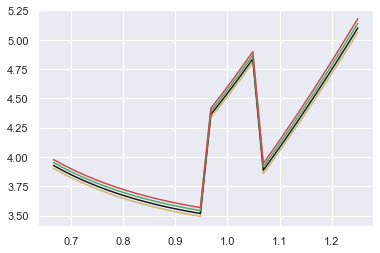

In [276]:
from itertools import product
values = list(product(range(aging_steps), range(aging_steps), range(aging_steps),range(aging_steps),gainr)) #to get all possible combinations
dfrds=pd.DataFrame(values)
dfrds.columns=['iRds1','iRds2','iRds3','iRds4','Gain']
df_aged=pd.merge(dfrds,df)
c=currents_L(df_aged['L'],df_aged['Vin'],df_aged['Vbus'],df_aged['Iin(A)'],df_aged['D1'],df_aged['D2'],df_aged['phi'],df_aged['T'])
interv=intervals(df_aged['D1'],df_aged['D2'],df_aged['phi'],df_aged['T'])
Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(df_aged['D1'],df_aged['D2'],df_aged['phi'],1/df_aged['T'],interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
g=df_aged['iRds1']
aux_M1=Losses_M1(df_aged['D1'],df_aged['Vin'],c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,1+g/aging_steps*aging_max)
h=df_aged['iRds2']
aux_M2=Losses_M2(df_aged['D1'],df_aged['Vin'],c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,1+h/aging_steps*aging_max)
i=df_aged['iRds3']
aux_M3=Losses_M3(df_aged['D2'],df_aged['Vbus'],c[2],c[0],1/df_aged['T'],M3_index,Vdrvr,Idrvr,Irms_M3,1+i/aging_steps*aging_max)
j=df_aged['iRds4']
aux_M4=Losses_M4(df_aged['D2'],df_aged['Vbus'],c[0],c[2],1/df_aged['T'],M4_index,Vdrvr,Idrvr,Irms_M4,1+j/aging_steps*aging_max)
Iac_ind=c[-1].max(axis=1)-c[-1].min(axis=1) 
dfrds['Iac_ind']=Iac_ind
Irms_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
df_aged['Irms_ind']=Irms_ind
df_aged['Ipk_ind']=c[-1].max(axis=1)

aux_L=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
losses_aged=aux_M1+aux_M2+aux_M3+aux_M4+aux_L
df_aged['Losses aged']=losses_aged #Este es el aging data del codgio de manu

fig, ax = plt.subplots()

ax.plot(df_aged.loc[(df_aged['iRds1']==0)&(df_aged['iRds2']==0)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0),'Gain'],df_aged.loc[(df_aged['iRds1']==0)&(df_aged['iRds2']==0)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0),'Losses aged'],'y')
ax.plot(df_aged.loc[(df_aged['iRds1']==1)&(df_aged['iRds2']==0)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0),'Gain'],df_aged.loc[(df_aged['iRds1']==1)&(df_aged['iRds2']==1)&(df_aged['iRds3']==1)&(df_aged['iRds4']==1),'Losses aged'],'k')
ax.plot(df_aged.loc[(df_aged['iRds1']==2)&(df_aged['iRds2']==0)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0),'Gain'],df_aged.loc[(df_aged['iRds1']==2)&(df_aged['iRds2']==2)&(df_aged['iRds3']==2)&(df_aged['iRds4']==2),'Losses aged'],'g')
ax.plot(df_aged.loc[(df_aged['iRds1']==3)&(df_aged['iRds2']==3)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0),'Gain'],df_aged.loc[(df_aged['iRds1']==3)&(df_aged['iRds2']==3)&(df_aged['iRds3']==3)&(df_aged['iRds4']==3),'Losses aged'],'r')
# Ya tengo una base de datos con todos los posibles valores de pérdidas en función del envejecimiento de cada MOSFET.
# aux1[age_MOSFET1][age_MOSFET2][age_MOSFET3][Age_MOSFET4][gain]
# Se tienen n edades de envejecimiento para cada MOSFET

#repeat what was done with the other 

def aging_estimation(coef_1_ini,coef_2_ini,coef_3_ini,coef_4_ini,error,df_losses):
    muestra_r=[0 for sample in range(df_losses.shape[0])]
    muestra=[0 for sample in range(df_losses.shape[0])]
    losses_not_damaged=[]
    df_not_damaged=pd.DataFrame()
    # Se toma una muestra de la diferencia entre un convertidor sano y uno envejecido según los coeficientes de arriba (muestra)
    # y la misma muestra con errores aleatorios (muestra_r) debido a medida con un máximo de (error%)
    for gain in df_losses['Gain'].unique():#variación de Gain
        #print("gain is:", gain)
        losses_not_damaged=np.append(losses_not_damaged,df_losses.loc[(df_losses['iRds1']==0)&(df_losses['iRds2']==0)&(df_losses['iRds3']==0)&(df_losses['iRds4']==0)& (df_losses['Gain']==gain),'Losses aged'])
    df_not_damaged['Gain']=df_losses['Gain'].unique()
    df_not_damaged['Losses not damaged']=losses_not_damaged
    df_losses=pd.merge(df_losses,df_not_damaged)
    df_losses['Diff_losses']=df_losses.loc[:,'Losses aged']-df_losses['Losses not damaged']
    df_losses['Diff_losses noise']=df_losses['Diff_losses']*(1+random.randint(-error, error)/1000)
    
    error_ind=((df_losses['Diff_losses noise']-df_losses['Diff_losses'])**2)
    df_losses['MSE_single']=error_ind 

    # Se busca por mínimos cuadrados la combinación de coefficentes que más aproximan el modelo a la muestra con errores de medición a
    # Es importante resaltar  Mque no se ha hecho con el modelo matemático, sino explorando la matrix de reusltados que se han sacado
    # con el modelo. Básicamente es lo mismo, pero sería bueno explorar si a partir de las ecuaciones se puede ganar algo.

    values_dummy=pd.DataFrame()

    r_valores = np.array(list(product(df_losses['iRds1'].unique(),df_losses['iRds2'].unique(), df_losses['iRds3'].unique(),df_losses['iRds4'].unique())))
    MSE=np.zeros(r_valores.shape[0]) 
    #Me quedo con todas las ocurrencias 
    for i in range(r_valores.shape[0]):
        sel_aging=df_aged.loc[(df_losses['iRds1']==r_valores[i][0])&(df_losses['iRds2']==r_valores[i][1])&(df_losses['iRds3']==r_valores[i][2])&(df_losses['iRds4']==r_valores[i][3])]

        suma_MSE=sel_aging['MSE_single'].sum()
        MSE[i]=(suma_MSE)#/(r_valores.shape[0])
    values_dummy['iRds1','iRds2','iRds3','iRds4','MSE']=r_valores[:,0],r_valores[:,1],r_valores[:,2],r_valores[:,3],MSE

    df_losses=pd.merge(df_losses,values_dummy)
    coef_1_out,coef_2_out,coef_3_out,coef_4_out=df_losses[df_losses['MSE']==df_losses['MSE'].min(),['iRds1','iRds2','iRds3','iRds4']] 
    return coef_1_out,coef_2_out,coef_3_out,coef_4_out,muestra,muestra_r


In [256]:
# MSE=np.zeros(r_valores.shape[0])
# r_valores=np.array(r_valores)
# for i in range(r_valores.shape[0]):
#     sel_aging=df_aged.loc[(df_aged['iRds1']==r_valores[i][0])&(df_aged['iRds2']==r_valores[i][1])&(df_aged['iRds3']==r_valores[i][2])&(df_aged['iRds4']==r_valores[i][3])]
#     MSE[i]=sel_aging['Losses aged'].sum() 
# MSE

In [255]:
# sel_aging

In [309]:
coef_1_ini=5
coef_2_ini=2
coef_3_ini=2
coef_4_ini=5

# muestra_r=[0 for gainr in range(elements)]
# muestra=[0 for gainr in range(elements)]
df_losses=df_aged.copy()
error=error_sense
# df_aged2=aging_estimation(coef_1_ini,coef_2_ini,coef_3_ini,coef_4_ini,error_sense,df_aged)
# df_aged2
# coef_1,coef_2,coef_3,coef_4,muestra,muestra_r=aging_estimation2(df_aged2)


muestra_r=[0 for sample in range(df_losses.shape[0])]
muestra=[0 for sample in range(df_losses.shape[0])]
losses_not_damaged=[]
df_not_damaged=pd.DataFrame()
    # Se toma una muestra de la diferencia entre un convertidor sano y uno envejecido según los coeficientes de arriba (muestra)
    # y la misma muestra con errores aleatorios (muestra_r) debido a medida con un máximo de (error%)
for gain in df_losses['Gain'].unique():#variación de Gain
       #print("gain is:", gain)
    losses_not_damaged=np.append(losses_not_damaged,df_losses.loc[(df_losses['iRds1']==0)&(df_losses['iRds2']==0)&(df_losses['iRds3']==0)&(df_losses['iRds4']==0)& (df_losses['Gain']==gain),'Losses aged'])
df_not_damaged['Gain']=df_losses['Gain'].unique()
df_not_damaged['Losses not damaged']=losses_not_damaged
df_losses=pd.merge(df_losses,df_not_damaged)
df_losses['Diff_losses']=df_losses.loc[:,'Losses aged']-df_losses['Losses not damaged']
df_losses['Diff_losses noise']=df_losses['Diff_losses']*(1+random.randint(-error, error)/1000)
    
error_ind=((df_losses['Diff_losses noise']-df_losses['Diff_losses'])**2)
df_losses['MSE_single']=error_ind 

    # Se busca por mínimos cuadrados la combinación de coefficentes que más aproximan el modelo a la muestra con errores de medición a
    # Es importante resaltar  Mque no se ha hecho con el modelo matemático, sino explorando la matrix de reusltados que se han sacado
    # con el modelo. Básicamente es lo mismo, pero sería bueno explorar si a partir de las ecuaciones se puede ganar algo.

values_dummy=pd.DataFrame()

r_valores = np.array(list(product(df_losses['iRds1'].unique(),df_losses['iRds2'].unique(), df_losses['iRds3'].unique(),df_losses['iRds4'].unique())))
MSE=np.zeros(r_valores.shape[0]) 
    #Me quedo con todas las ocurrencias 
for i in range(r_valores.shape[0]):
    sel_aging=df_aged.loc[(df_losses['iRds1']==r_valores[i][0])&(df_losses['iRds2']==r_valores[i][1])&(df_losses['iRds3']==r_valores[i][2])&(df_losses['iRds4']==r_valores[i][3])]

    suma_MSE=sel_aging['MSE_single'].sum()
    MSE[i]=(suma_MSE)#/(r_valores.shape[0])
values_dummy['iRds1']=r_valores[:,0]
values_dummy['iRds2']=r_valores[:,1]
values_dummy['iRds3']=r_valores[:,2]
values_dummy['iRds4']=r_valores[:,3]
values_dummy['MSE']=MSE

df_losses=pd.merge(df_losses,values_dummy)
df_losses=df_losses.drop(df_losses[df_losses['MSE']==0].index)
coef_1_out,coef_2_out,coef_3_out,coef_4_out=df_losses.loc[df_losses['MSE']==df_losses['MSE'].min(),['iRds1','iRds2','iRds3','iRds4']] 
df_losses.loc[df_losses['MSE']==df_losses['MSE'].min()]

,iRds1,iRds2,iRds3,iRds4,Gain,D1,D2,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Irms_ind,Ipk_ind,Losses aged,Losses not damaged,Diff_losses,Diff_losses noise,MSE_single,MSE
30,0,0,0,1,0.666667,0.666667,0.000000,0.0,0.000006,180000.0,0.000083,150.000000,100.0,500.0,3.333333,5.000000,6.108893,3.901844,3.901844,0.000000,0.000000,0.000000e+00,1.268736e-07
31,0,0,0,1,0.686782,0.686782,0.000000,0.0,0.000006,180000.0,0.000083,145.606695,100.0,500.0,3.433908,5.000000,6.041977,3.853533,3.853533,0.000000,0.000000,0.000000e+00,1.268736e-07
32,0,0,0,1,0.706897,0.706897,0.000000,0.0,0.000006,180000.0,0.000083,141.463415,100.0,500.0,3.534483,5.000000,5.975061,3.809243,3.809243,0.000000,0.000000,0.000000e+00,1.268736e-07
33,0,0,0,1,0.727011,0.727011,0.000000,0.0,0.000006,180000.0,0.000083,137.549407,100.0,500.0,3.635057,5.000000,5.908145,3.768624,3.768624,0.000000,0.000000,0.000000e+00,1.268736e-07
34,0,0,0,1,0.747126,0.747126,0.000000,0.0,0.000006,180000.0,0.000083,133.846154,100.0,500.0,3.735632,5.000000,5.841229,3.731363,3.731363,0.000000,0.000000,0.000000e+00,1.268736e-07
35,0,0,0,1,0.767241,0.767241,0.000000,0.0,0.000006,180000.0,0.000083,130.337079,100.0,500.0,3.836207,5.000000,5.774313,3.697181,3.697181,0.000000,0.000000,0.000000e+00,1.268736e-07
36,0,0,0,1,0.787356,0.787356,0.000000,0.0,0.000006,180000.0,0.000083,127.007299,100.0,500.0,3.936782,5.000000,5.707397,3.665824,3.665824,0.000000,0.000000,0.000000e+00,1.268736e-07
37,0,0,0,1,0.807471,0.807471,0.000000,0.0,0.000006,180000.0,0.000083,123.843416,100.0,500.0,4.037356,5.000000,5.640481,3.637063,3.637063,0.000000,0.000000,0.000000e+00,1.268736e-07
38,0,0,0,1,0.827586,0.827586,0.000000,0.0,0.000006,180000.0,0.000083,120.833333,100.0,500.0,4.137931,5.000000,5.573566,3.610688,3.610688,0.000000,0.000000,0.000000e+00,1.268736e-07
39,0,0,0,1,0.847701,0.847701,0.000000,0.0,0.000006,180000.0,0.000083,117.966102,100.0,500.0,4.238506,5.000000,5.506650,3.586507,3.586507,0.000000,0.000000,0.000000e+00,1.268736e-07


In [298]:
df_losses.loc[(df_losses['MSE']==df_losses['MSE'].min())&(df_losses['MSE']!=0),['Gain','iRds1','iRds2','iRds3','iRds4']] 

,Gain,iRds1,iRds2,iRds3,iRds4


In [181]:
# # ESTO ESUNA PRUEBA PARA VER LAS COSAS
# df_aged['Delta_losses']=df_aged.loc[:,'Losses aged']-np.array(df_aged.loc[(df_aged['iRds1']==0)&(df_aged['iRds2']==0)&(df_aged['iRds3']==0)&(df_aged['iRds4']==0)& (df_aged['Gain']==df_aged['Gain'].unique()[0]),'Losses aged'])

# # df_aged.loc[(df_aged['iRds1']==r_valores[0][0])&(df_aged['iRds2']==r_valores[0][1])&(df_aged['iRds3']==r_valores[0][2])&(df_aged['iRds4']==r_valores[0][3])]['Losses aged'].sum()
# r_valores = list(product(df_aged['iRds1'].unique(),df_aged['iRds2'].unique(), df_aged['iRds3'].unique(),df_aged['iRds4'].unique()))
# #Me quedo con todas las ocurrencias 
# df_aged.loc[(df_aged['iRds1']==r_valores[0][0])&(df_aged['iRds2']==r_valores[0][1])&(df_aged['iRds3']==r_valores[0][2])&(df_aged['iRds4']==r_valores[0][3])] 
# df_aged.loc[(df_aged['iRds1']==r_valores[0][0])&(df_aged['iRds2']==r_valores[0][1])&(df_aged['iRds3']==r_valores[0][2])&(df_aged['iRds4']==r_valores[0][3])]['Losses aged'].sum()

122.17941973820552

In [158]:
# df_flosses=df_aged.copy()
# losses_not_damaged=[]
# df_not_damagedr=pd.DataFrame()
# for gain in df_flosses['Gain'].unique():#variación de Gain 
#         losses_not_damaged=np.append(losses_not_damaged,df_flosses.loc[(df_flosses['iRds1']==0)&(df_flosses['iRds2']==0)&(df_flosses['iRds3']==0)&(df_flosses['iRds4']==0)& (df_flosses['Gain']==gain),'Losses aged'])
# df_not_damagedr['Gain']=df_flosses['Gain'].unique()
# df_not_damagedr['Losses not damaged']=losses_not_damaged
# df_flosses=pd.merge(df_flosses,df_not_damagedr)
# df_flosses

,iRds1,iRds2,iRds3,iRds4,Gain,D1,D2,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Irms_ind,Ipk_ind,Losses aged,loss difference,Losses not damaged
0,0,0,0,0,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.0,100.0,500.0,3.333333,5.00,6.108893,3.901844,0.000000,3.901844
1,0,0,0,1,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.0,100.0,500.0,3.333333,5.00,6.108893,3.901844,0.000000,3.901844
2,0,0,0,2,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.0,100.0,500.0,3.333333,5.00,6.108893,3.901844,0.000000,3.901844
3,0,0,0,3,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.0,100.0,500.0,3.333333,5.00,6.108893,3.901844,0.000000,3.901844
4,0,0,0,4,0.666667,0.666667,0.0,0.0,0.000006,180000.0,0.000083,150.0,100.0,500.0,3.333333,5.00,6.108893,3.901844,0.000000,3.901844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38875,5,5,5,1,1.250000,1.000000,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.250000,6.25,6.782269,5.241094,1.339250,5.060972
38876,5,5,5,2,1.250000,1.000000,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.250000,6.25,6.782269,5.245010,1.343166,5.060972
38877,5,5,5,3,1.250000,1.000000,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.250000,6.25,6.782269,5.248925,1.347081,5.060972
38878,5,5,5,4,1.250000,1.000000,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.250000,6.25,6.782269,5.252841,1.350997,5.060972


In [100]:
# df_aged.loc[df_aged['Gain']==1.25]

,iRds1,iRds2,iRds3,iRds4,Gain,D1,D2,phi,T,fsw,L,Vin,Vbus,P,Iin(A),Irms_ind,Ipk_ind,Losses aged,loss difference
37584,0,0,0,0,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.060972,1.159128
37585,0,0,0,1,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.064888,1.163044
37586,0,0,0,2,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.068804,1.166959
37587,0,0,0,3,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.072719,1.170875
37588,0,0,0,4,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.076635,1.174791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38875,5,5,5,1,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.241094,1.339250
38876,5,5,5,2,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.245010,1.343166
38877,5,5,5,3,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.248925,1.347081
38878,5,5,5,4,1.25,1.0,0.2,0.0,0.000006,180000.0,0.000083,80.0,100.0,500.0,6.25,6.25,6.782269,5.252841,1.350997


PRUEBA MULTITINDEZ CON t1

In [ ]:
# PRUEBA=t1(df['D1'],df['D2'],df['phi'],df['T']).T




# df1=pd.DataFrame(PRUEBA)
# df1t=df1.T
# col1=['t'+ str(i) for i in range (df1t.shape[1])]
# col1=[i for i in range (df1t.shape[1])]
# col2=['t1' for i in range (len(col1))]
# columns=pd.MultiIndex.from_arrays([col2,col1])
# df1t.columns=columns
# df1t
# # df1t.to_numpy()[:,-1]




In [62]:
# i=0
# losses=[0 for i in range(elements)]
# gainr=np.linspace(gain_min,gain_max,elements)
# D2x_test=[]
# D1x_test=[]
# for gain in gainr:
#     if (gain<gain_vert):
#         D2x=0
#         D1x=gain 
#     elif(gain<gain_horz):
#         D1x=D1_max
#         D2x=1-D1x/gain
#     else:
#         D1x=1
#         D2x=1-D1x/gain
#     D1x_test=np.append(D1x_test,D1x)
   
#     D2x_test=np.append(D2x_test,D2x)

#     # c=currents_L(L_ind,Vbus/gain,Vbus,P/(Vbus/gain),D1x,D2x,phi_bob,T)
#     # print("currents sahpe",np.asarray(c).shape)
#     # interv=intervals(D1x,D2x,phi_bob,T)
#     # # print("intervales: ",np.asarray(interv).shape)
#     # Irms_M1,Irms_M2,Irms_M3,Irms_M4=Irms_Mi(D1x,D2x,phi_bob,fsw,interv[2],interv[5],interv[8],interv[11],interv[1],c[0],c[1],c[2],c[3])
#     # aux_M1=Losses_M1(D1x,Vbus/gain,c[3],c[1],fsw,M1_index,Vdrvr,Idrvr,Irms_M1,aging)
#     # aux_M2=Losses_M2(D1x,Vbus/gain,c[1],c[3],fsw,M2_index,Vdrvr,Idrvr,Irms_M2,aging)
#     # aux_M3=Losses_M3(D2x,Vbus,c[2],c[0],fsw,M3_index,Vdrvr,Idrvr,Irms_M3,aging)
#     # aux_M4=Losses_M4(D2x,Vbus,c[0],c[2],fsw,M4_index,Vdrvr,Idrvr,Irms_M4,aging)
#     # Iac_ind=max(c)-min(c)
#     # Irms_ind=Iind_avg(c[3],c[0],c[1],c[2],interv[2]-interv[1],interv[5]-interv[4],interv[8]-interv[7],interv[11]-interv[10])
#     # aux_L=Losses_ind(c_ind,x_ind,y_ind,Vol_ind,fsw,L_ind,Iac_ind,N_ind,Ae_ind,Irms_ind,Awire_ind,Lwire_ind,rho)
#     # aux=aux_M1+aux_M2+aux_M3+aux_M4+aux_L
#     # losses[i]=aux
#     # i=i+1
# fig, ax = plt.subplots()
# print(D2x_test)
# print(D2x_test.shape)
# # ax.plot(gainr,losses,'ko')
# # plt.show()




masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

Es interesante comprobar que la precisión del método depende mucho del D2_nom que se escoja. 